# Проектная работа
# «Анализ оттока клиентов»

**Заголовок:** Анализ оттока клиентов в региональном банке «Метанпромбанк».

**Описание проекта:** Проект направлен на анализ и прогнозирование оттока клиентов в банке с использованием клиентских данных. В рамках проекта необходимо выделить сегменты клиентов, склонных к уходу из банка, проанализировать факторы, влияющие на отток, и сформулировать рекомендации по работе с такими клиентами. Основная цель — разработать рекомендации для отдела маркетинга, представить компактные однородные сегменты и предложить примеры мероприятий, которые могут помочь вернуть клиентов в банк или удержать сомневающихся от оттока.
**Ход исследования:**
1. [Импорт необходимых библиотек. Загрузка и предварительное ознакомление с данными.](#step_1)
2. [Подготовка данных.](#step_2)
3. [Проведение исследовательского анализа данных (EDA).](#step_3)
4. [Проверка статистических гипотез.](#step_4)
5. [Подведение промежуточных итогов.](#step_5)
6. [Сегментация (неузкие сегменты (от 500 клиентов на сегмент).](#step_6)
7. [Приоритизация сегментов.](#step_7)
8. [Формирование рекомендаций (таргетированных) по работе с клинетам.](#step_8)


**1. Импорт необходимых библиотек. Загрузка и предварительное ознакомление с данными.**
* Импорт необходимых библиотек.
* Загрузка данных в DataFrame
* Получение краткой сводки о DataFrame
* Описание данных

**2. Подготовка данных.**
* Приведение названий столбцов к формату snake_case
* Корректировка типов данных (если требуется)
* Классификация пропусков (анализ природы пропусков и их разумная обработка)
* Проверка на дубликаты, анализ неявных дубликатов по user_id

**3. Проведение исследовательского анализа данных (EDA).**
1. Анализ распределения признаков в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку):
* Строим гистограммы распределения для непрерывных значений, определяем интервалы значений с повышенным уровнем оттока (выше среднего по банку).
* Строим графики boxplot для дискретные значений 
* Для категориальных выявляем категории, где доля оттока превышает средний уровень по банку.
2. Анализ портретов клиентов в разрезе оттока (Группировка по оттоку churn).
3. Корреляционный анализ признака churn с другими признаками. Расчет корреляции Пирсона и корреляции Phik. Интерпретируем силу связи на основе полученных коэффициентов по Чеддоку.

**4. Проверка статистических гипотез:**
* Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
* Другие гипотезы будут сформулирванны после проведения исследовательского анализа данных.

**5. Подведение промежуточных итогов - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток.**

**6. Сегментация (неузкие сегменты (от 500 клиентов на сегмент); не менее трёх; отток выше, чем средний уровень оттока по банку).**
1. Вручную переберём сочетания интервалов/значений признаков с повышенным оттоком (на основе EDA).
2. Выберем не менее трёх сегментов с наибольшим процентом оттока, учитывая размер группы (≥500 клиентов).

**7.  Приоритизация сегментов.**
Расставим приоритеты среди сегментов клиентов. В первую очередь будем ориентироваться на процент оттока. Остальные приоритеты определим после проведения исследовательского анализа данных и сегментации клиентов (например, средний уровень score, зарплаты или баланса).

<a id="step_8"></a>
**8. Формирование рекомендаций (таргетированных) по работе с клиентамию**

# Проект "Банки — Анализ оттока клиентов"
**Материалы**
* [Презентация] (https://drive.google.com/file/d/1rchgoVEKhn1MpLXxS1Ju4AFLV9M9PGxc/view?usp=sharing)

<a id="step_1"></a>
##  Импорт необходимых библиотек. Загрузка и предварительное ознакомление с данными.
1. Импорт необходимых библиотек и установка общиъ настроек.
2. Загрузка данных в DataFrame
3. Получение краткой сводки о DataFrame
4. Описание данных

### Импорт необходимых библиотек.

In [1]:
# Импортирование необходимых библиотек и установка общиъ настроек
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

import numpy as np

import phik

from scipy import stats as st

In [2]:
# Установка высокого DPI для всех графиков
plt.rcParams['figure.dpi'] = 150  # Оптимальное значение для экрана (120-200)

# Настройка стиля графиков
sns.set(style="whitegrid")

# Настройка полного показа ячеек
pd.set_option('display.max_colwidth', None)

### Загрузка данных в DataFrame

In [3]:
# Загружаем датасет
from io import BytesIO
import requests
spreadsheet_id = '1sIXVildMP4e1ZR3tFvjWnk-IFCoRlqGsVcQ1cM9V_cU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head(15)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


### Получение краткой сводки о DataFrame

In [4]:
# Выводим на экран количество записей и полей в датасете и сохраним исходное количество строк в переменную num_rows_start
# Получаем краткую сводку о DataFrame
num_rows_start = df.shape[0]
print(f'Число записей в датафрейме {num_rows_start}')
print(f'Число полей в датафрейме {df.shape[1]}')
print()
df.info()

Число записей в датафрейме 10000
Число полей в датафрейме 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
# Объявим функцию для подсчета количества пропусков
def missing_values_report(df):
    report = df.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / df.shape[0] * 100).round(2)
    print(report.sort_values(by = 'missing_values', ascending = False))
    print()

    if report['missing_values'].sum() == 0:
        print('В датасете нет пропусков')

In [6]:
# Выведем количество пропусков
missing_values_report(df)

               missing_values  % of total
balance                  2295       22.95
age                        26        0.26
USERID                      0        0.00
score                       0        0.00
city                        0        0.00
gender                      0        0.00
equity                      0        0.00
products                    0        0.00
credit_card                 0        0.00
last_activity               0        0.00
EST_SALARY                  0        0.00
churn                       0        0.00



### Описание данных

Загрузили датасет `bank_scrooge.csv`. В датасете 12 столбцов и 10 000 записей. 
1. Нужно привезти наименование столбцов в snake_case.
2. Преобразовать типы столбцов 'score' и 'age' к типу данных int.
3. Разобраться с пропусками в столбцах 'balance' и 'age'.
4. Проверить на дубликаты.

<a id="step_2"></a>
##  Подготовка данных.
1. Приведение названий столбцов к формату snake_case
2. Корректировка типов данных
3. Классификация пропусков (анализ природы пропусков и их разумная обработка)
4. Проверка на дубликаты, анализ неявных дубликатов по user_id

### Приведение названий столбцов к формату snake_case

In [7]:
# Приведём наименование полей к snake_case
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Корректировка типов данных

In [8]:
# Преобразуем форматы данных в двух столбцах
df['score'] = df['score'].astype('int')
df['age'] = df['age'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   Int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: Int64(1), float64(2), int64(7), object(2)
memory usage: 947.4+ KB


### Классификация пропусков (анализ природы пропусков и их разумная обработка)
Для анализа пропусков в столбцах `balance` и `age`: 
1. Создадим столбцы 'nan_balance' и 'nan_age', где 1 - есть пропуски, 0 - нет пропуском.
2. Построим матрицу корреляций.
3. Построим тепловые карты для столбцов `nan_balance` и `nan_age`. 
4. Сделаем выводы.

In [9]:
# Создаем столбец nan_balance и заполняем его
df['nan_balance'] = df['balance']
df['nan_balance'] = df['nan_balance'].apply(lambda x: 1 if pd.isna(x) else 0)

# Создаем столбец nan_age и заполняем его
df['nan_age'] = df['age']
df['nan_age'] = df['nan_age'].apply(lambda x: 1 if pd.isna(x) else 0)

df

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,nan_balance,nan_age
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,1,0
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,1,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,0


In [10]:
# Создаем корреляционную матрицу, удалив неактуальный столбец 'userid'
df_corr = df.drop('userid', axis=1).corr()

# Удаляем строки 'nan_balance', 'nan_age', чтобы не отражать их на графике
df_corr = df_corr.drop(['nan_balance', 'nan_age'], axis=0)

df_corr

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,nan_balance,nan_age
score,1.000000,-0.011814,0.064126,0.235812,-0.004115,-0.094732,-0.031179,0.163866,0.105962,0.138871,0.005035
age,-0.011814,1.000000,0.020628,0.069745,0.017182,-0.123128,-0.008157,-0.039598,-0.049797,-0.028659,NaN
equity,0.064126,0.020628,1.000000,0.164126,0.432069,-0.167506,-0.001970,-0.171974,0.270559,-0.709951,-0.032040
balance,0.235812,0.069745,0.164126,1.000000,0.075684,-0.059253,0.025004,0.339622,0.085577,NaN,0.007686
products,-0.004115,0.017182,0.432069,0.075684,1.000000,-0.251390,0.037141,-0.118054,0.300964,-0.487512,-0.033751
credit_card,-0.094732,-0.123128,-0.167506,-0.059253,-0.251390,1.000000,-0.033445,0.035556,-0.130790,0.158334,0.009726
last_activity,-0.031179,-0.008157,-0.001970,0.025004,0.037141,-0.033445,1.000000,0.003039,0.168767,0.028362,0.025120
est_salary,0.163866,-0.039598,-0.171974,0.339622,-0.118054,0.035556,0.003039,1.000000,0.001273,0.307154,0.011252
churn,0.105962,-0.049797,0.270559,0.085577,0.300964,-0.130790,0.168767,0.001273,1.000000,-0.249421,-0.018994


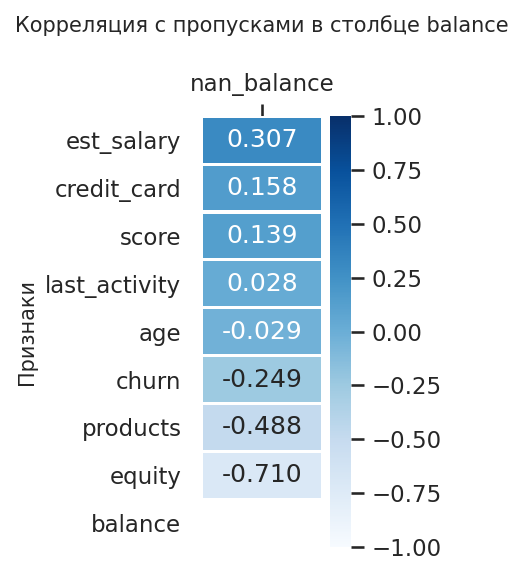

In [11]:
# Строим тепловую карту для nan_balance

# Создаем фигуру с нужным размером
plt.figure(figsize=(3, 4))

# Создаем тепловую карту для одного ряда 
ax = sns.heatmap(pd.DataFrame(df_corr['nan_balance'].sort_values(ascending=False)),  # Сортируем значения корреляции для столбца 'nan_balance'
                 annot=True,       # Показывать значения в ячейках
                 fmt=".3f",        # Формат чисел (3 знака после запятой)
                 cmap="Blues",     # Цветовая схема
                 vmin=-1,           # Минимальное значение шкалы
                 vmax=1,           # Максимальное значение шкалы
                 cbar=True,        # Показать цветовую шкалу
                 linewidths=1)    # Толщина линий между ячейками

# Настройка внешнего вида
ax.set_title('Корреляция с пропусками в столбце balance', pad=20, fontsize=10)
ax.set_ylabel('Признаки', fontsize=10)

ax.xaxis.set_ticks_position('top')  # Перемещаем подписи оси X наверх

plt.tight_layout()
plt.show()

Мы наблюдаем высокую корреляцию пропусков в столбце `Balance` с equity. Чем больше баллов собственности, тем меньшая вероятность наличия пропуска по балансу в этой строке. 

Также мы отмечаем умеренные корреляции с признаками est_salary и products.

Пропуски в столбце Balance можно отнести к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, и без дополнительного обоснования их нельзя просто отбросить или заполнить одним значением, так как это может привести к значительным искажениям. Поэтому мы не будем обрабатывать пропуски в столбце `Balance`.

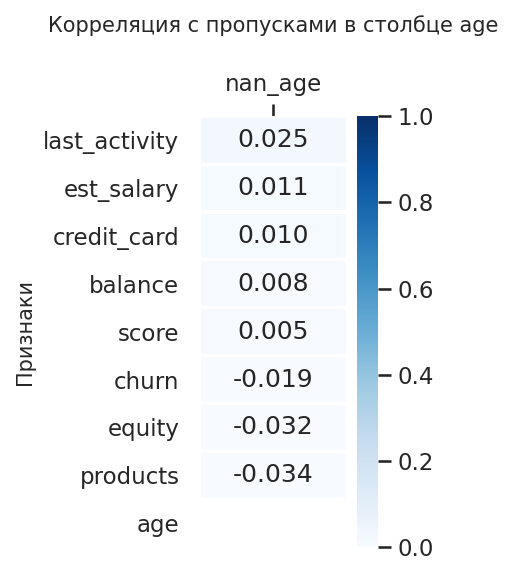

In [12]:
# Строим тепловую карту для nan_age

# Создаем фигуру с нужным размером
plt.figure(figsize=(3, 4))

# Создаем тепловую карту для одного ряда
ax = sns.heatmap(pd.DataFrame(df_corr['nan_age'].sort_values(ascending=False)),  # Сортируем значения корреляции для столбца 'age'
                 annot=True,       # Показывать значения в ячейках
                 fmt=".3f",        # Формат чисел (3 знака после запятой)
                 cmap="Blues",     # Цветовая схема
                 vmin=0,           # Минимальное значение шкалы
                 vmax=1,           # Максимальное значение шкалы
                 cbar=True,        # Показать цветовую шкалу
                 linewidths=1)    # Толщина линий между ячейками

# Настройка внешнего вида
ax.set_title('Корреляция с пропусками в столбце age', pad=20, fontsize=10)
ax.set_ylabel('Признаки', fontsize=10)

ax.xaxis.set_ticks_position('top')  # Перемещаем подписи оси X наверх

plt.tight_layout()
plt.show()

В столбце `age` пропуски не коррелируются с какими-либо другими признаками, соответственно их можно отнести к категории MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке. Не будем обрабатывать пропуски в столбце `age`.
Удалим столбцы 'nan_balance' и 'nan_age', так как они больше не понадобятся.

In [13]:
df = df.drop(['nan_balance', 'nan_age'], axis=1)

### Проверка на дубликаты, анализ неявных дубликатов по user_id
1. Проверим дубликаты всей строки
2. Проверим на дубликаты по user_id

#### Проверим дубликаты всей строки

In [14]:
# Проверяем на дубликаты всей строки
print(f'Количество дубликатов строк: {df.duplicated().sum()}')

Количество дубликатов строк: 0


#### Проверим на дубликаты по user_id

In [15]:
# Проверяем на дублирование userid, сортируем и выводим на печать дубликаты по userid
df[df.duplicated(subset=['userid'], keep=False)].sort_values('userid').head(20)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0


Из отсортированной таблицы видно, что у пользователей из разных городов встречаются одинаковые ID. Вероятно, при регистрации клиентов в разных городах могло происходить присвоение одинаковых ID.

Чтобы проверить это, нужно убедиться, что нет дубликатов по комбинации user_id + city. Если таких дубликатов нет, значит, все клиенты уникальны (несмотря на совпадение ID), и удалять записи с повторяющимися ID нельзя.

In [16]:
print(f"Количество дубликатов по userid и city: {df.duplicated(subset=['userid','city']).sum()}")

Количество дубликатов по userid и city: 0


Дубликатов по комбинации user_id + city не обнаружено, значит, все записи уникальны. Исходный датафрейм оставляем без изменений, но удалим столбец user_id, так как он не нужен для дальнейшего анализа и может мешать при расчете корреляций.

In [17]:
# Удаляем столбец userid
df = df.drop('userid', axis=1)
# Проверяем удаление столбца
df.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


**Выводы по шагу 2:**
1. Привели наименования столбцов к формату snake_case.
2. Скорректировали типы данных в столбцах `score` и `age`.
3. Провели анализ пропусков в столбце `balance` и `age`. Пропуски в столбце `balance` отнесли к MNAR (Missing Not At Random / Отсутствует не случайно), пропуски в столбце `age` отнесли к MCAR (Missing Completely At Random / Отсутствует совершенно случайно) . Обрабатывать пропуски не стали.

4. Проверили дубликаты по `userid`, ими оказались пользователи из разных городов, поэтому удаление дубликатов не требуется.

5. Удалили столбец `userid`, чтобы он не мешал в дальнейшем исследовании.

<a id="step_3"></a>
## Проведение исследовательского анализа данных (EDA).
1. Анализ распределения признаков в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку):
* Строим гистограммы распределения для непрерывных значений, определяем интервалы значений с повышенным уровнем оттока (выше среднего по банку).
* Строим графики barplot для дискретные значений 
* Для категориальных выявляем категории, где доля оттока превышает средний уровень по банку.
2. Анализ портретов клиентов в разрезе оттока (Группировка по оттоку churn).
3. Корреляционный анализ признака churn с другими признаками. Расчет корреляции Phik. Интерпретируем силу связи на основе полученных коэффициентов по Чеддоку.

### Анализ распределения признаков в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку)
Для начала получим статистическую сводку по датафрейму.

In [18]:
df.describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Построим гистограммы для непрерывных признаков по столбцам `balance` и `est_salary`. Если графики окажутся нечитаемыми, необходимо удалить выбросы.

Затем построим графики barplot для категориальных и дискретных значений по столбцам `score`,  `age`,  `equity`,  `products` `credit_card` и `last_activity`.
* Поскольку в столбце`score` много уникальных значений, для повышения читаемости графика необходимо выполнить категоризацию

#### Строим гистограммы для непрерывных признаков
Для этого:
1. Объявим функцию для построения графиков и добавим в нее возможность удаления выбросов для улучшения читаемости графиков.
2. Построим графики с помощью этой функции и сделаем их описание.

In [19]:
# Объявляем кастомную функцию
def continuous_columns_histplot(df, column, rus_name, trim_tails=True, bins='auto'):
    
    # Присваиваем переменной hist_data датафрейм для построения графиков 
    hist_data = df.copy()
    
    # если trim_tails=True то удаляем выбросы
    if trim_tails:
        # Расчет межквартильного размаха
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Удаление выбросов с помощью межквартильного размаха
        hist_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
      
    # Создание гистограммы 
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=hist_data,
        bins=bins,
        x=column,
        hue='churn',
        stat="density",      # Нормировка на плотность
        common_norm=False,   # Раздельная нормировка для групп
        kde=True,            
        alpha=0.6,
    )

    # Настройка осей и подписей
    plt.title(f'График распределения для признака "{rus_name}"')
    plt.xlabel(f'{rus_name}, руб.')
    plt.ylabel('Плотность распределения')
    plt.legend(title='Отток', labels=['Ушедшие','Лояльные'])

    # Форматирование осей
    plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Для нормального отображения значений по оси X
   
    plt.show()

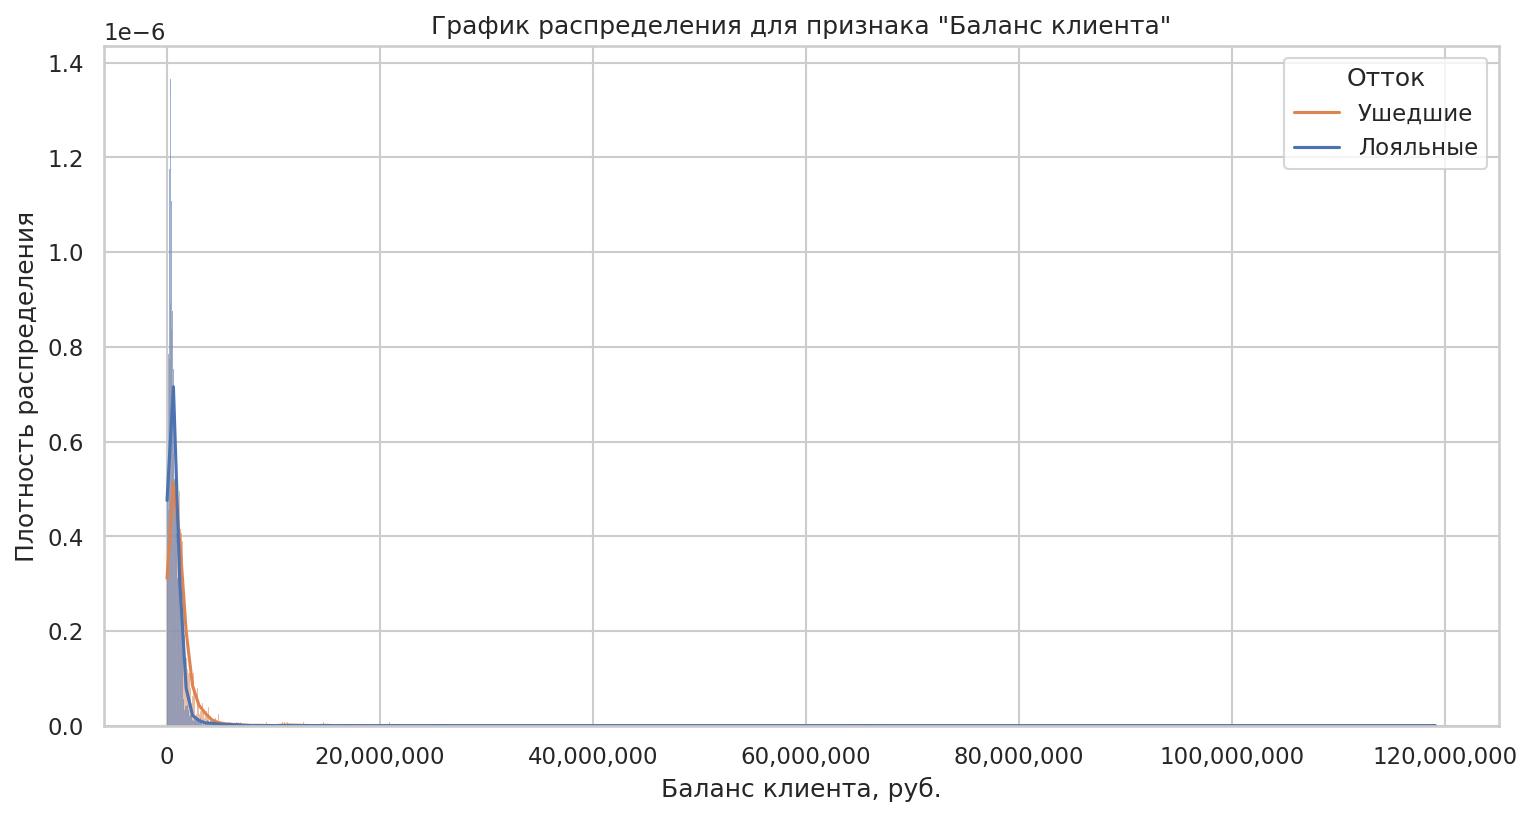

In [20]:
# Строим гистограмму распределения баланса клиентов без удаления выбросов
continuous_columns_histplot(df, 'balance', 'Баланс клиента', trim_tails=False)

Из-за наличия выбросов график становится нечитаемым.

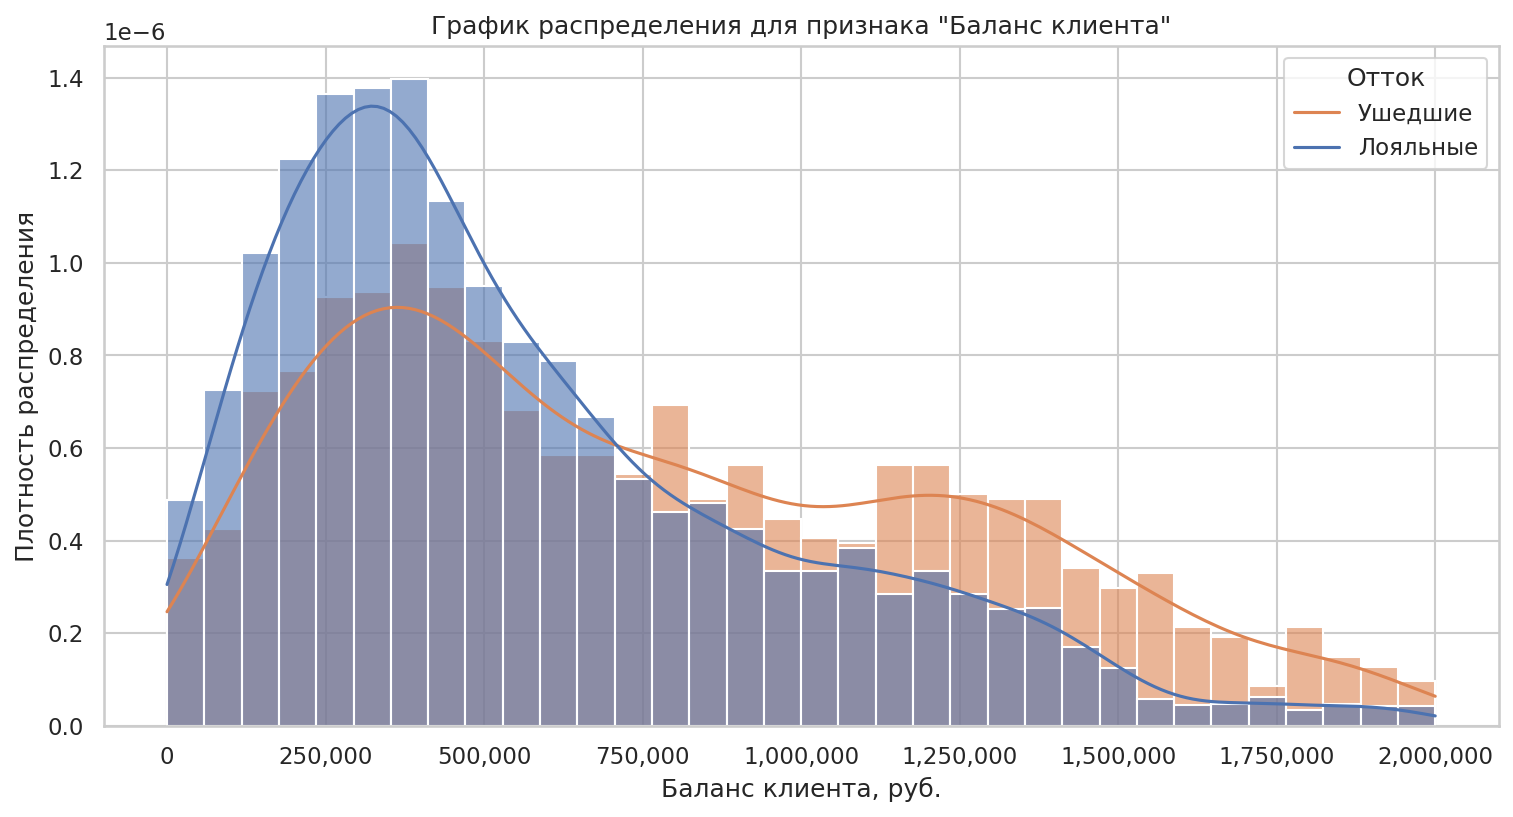

In [21]:
# Строим гистограмму распределения баланса клиентов с предварительынм удалением выбросов
continuous_columns_histplot(df, 'balance', 'Баланс клиента', trim_tails=True)

На графике "Распределение баланса клиента" можно заметить, что до баланса в 750 000 рублей преобладают лояльные клиенты. Однако при превышении этого порога наблюдается рост числа ушедших клиентов, который продолжается до максимальных значений. Таким образом, отточенный интервал будет составлять суммы свыше 750 000 рублей.

Можно сформулировать гипотезу: отточенные клиенты имеют больше денег на балансе.

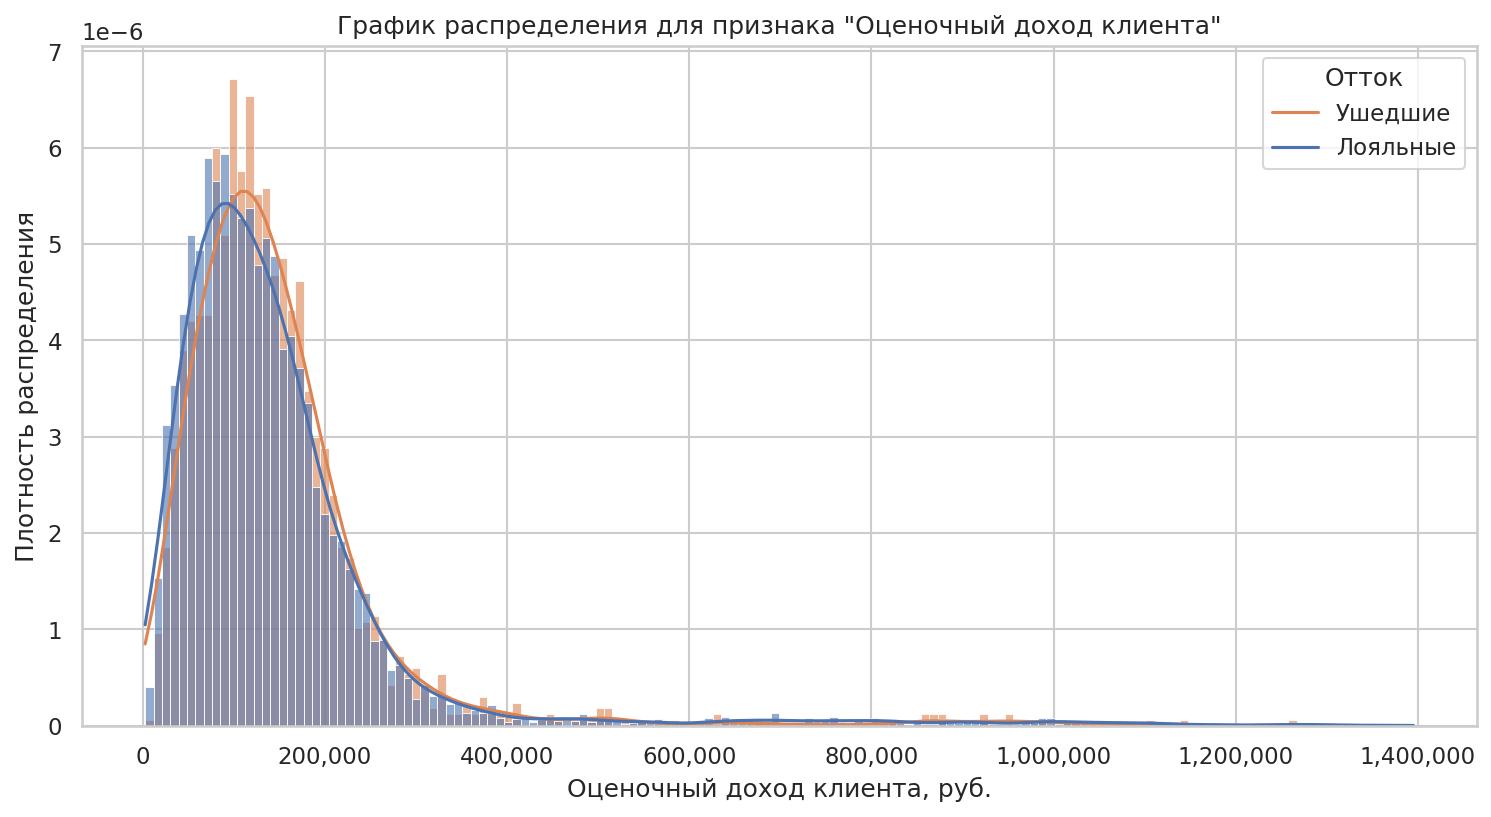

In [22]:
# Строим гистограмму распределения оценочного дохода клиентов без удаления выбросов
continuous_columns_histplot(df, 'est_salary', 'Оценочный доход клиента', trim_tails=False)

Из-за наличия выбросов график сложно интерпретировать

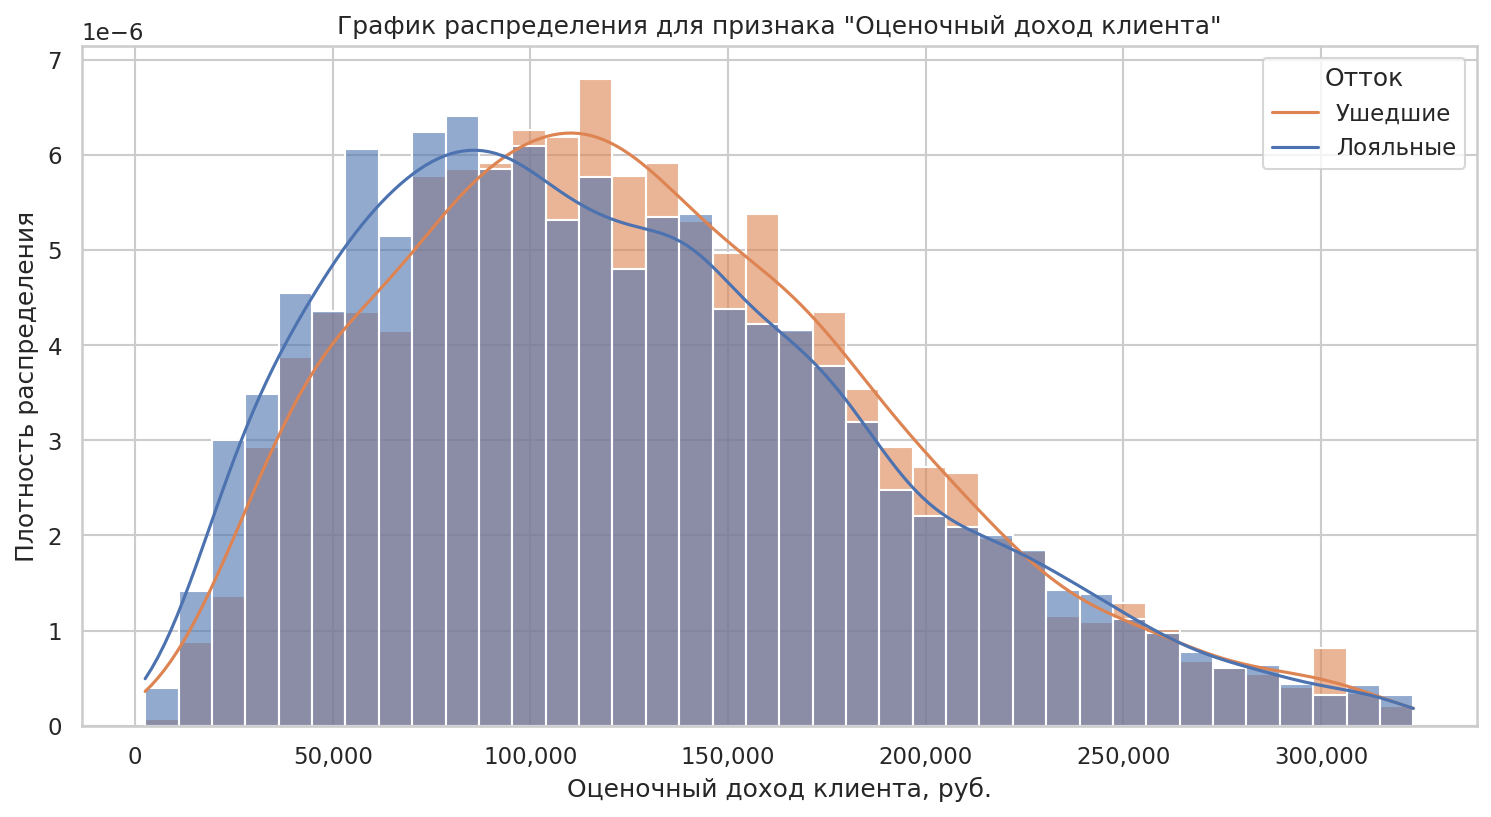

In [23]:
# Строим гистограмму распределения оценочного дохода клиентов с предварительынм удалением выбросов
continuous_columns_histplot(df, 'est_salary', 'Оценочный доход клиента', trim_tails=True)

На графике "Распределение оценочного дохода клиента" видно, что доходы отточных клиентов находятся в диапазоне от 100 000 до 220 000 рублей. Однако для доходов свыше 300 000 рублей невозможно однозначно определить, какая из групп — отточные или лояльные клиенты — имеет преимущество. В целом, доходы отточных и лояльных клиентов схожи. 

Для более точной оценки необходимо проверить гипотезу о равенстве доходов между отточными и лояльными клиентами.

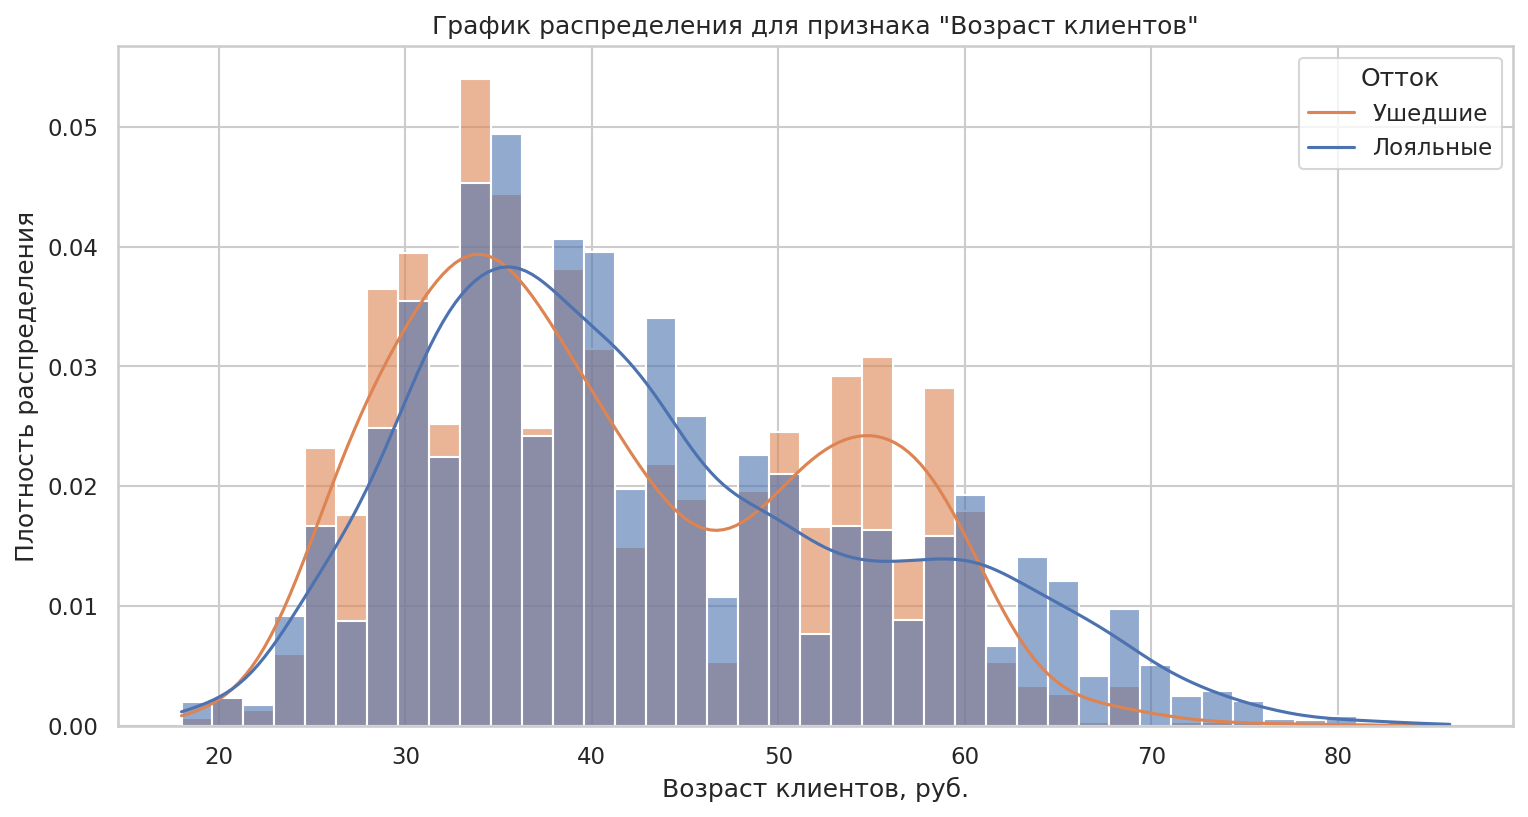

In [24]:
# Строим гистограмму распределения возраста клиентов без удаления выбросов

# Предварительно убираем пропуски в столбце age для построения графика
df_age_clean = df.dropna(subset=['age']).copy()
df_age_clean['age'] = df_age_clean['age'].astype('int64')

continuous_columns_histplot(df_age_clean, 'age', 'Возраст клиентов', trim_tails=False)

На графике можно выделить две возрастные категории с оттоком выше среднего по банку: 
1. Клиенты в возрастной категории от 25 до 35 лет.
2. Клиенты в возрастной категории от 50 до 60 лет.

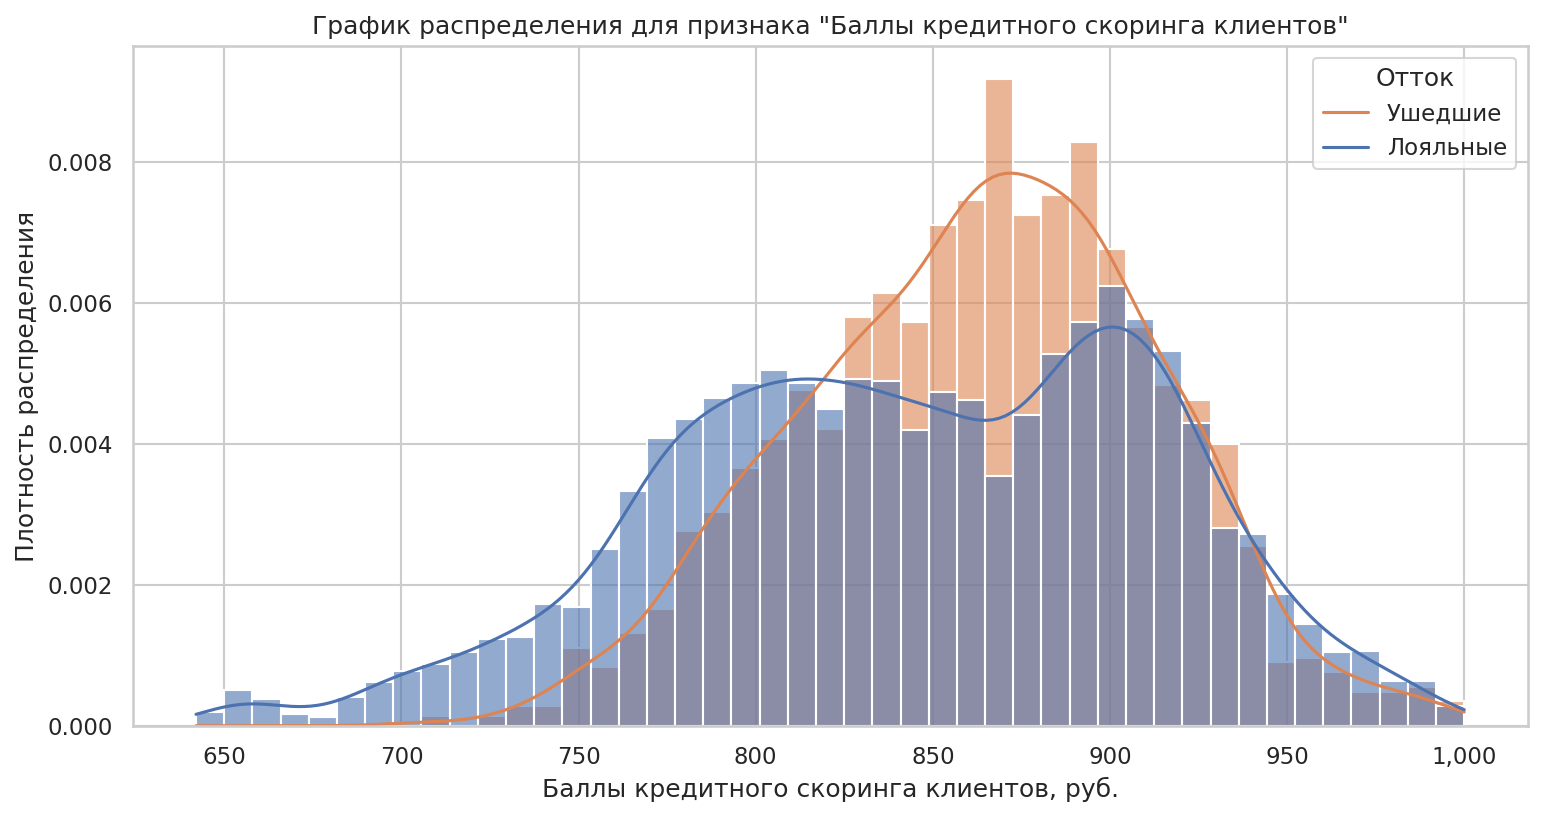

In [25]:
# Строим гистограмму распределения Баллов кредитного скоринга клиентов без удаления выбросов
continuous_columns_histplot(df, 'score', 'Баллы кредитного скоринга клиентов', trim_tails=False, bins=45)

Мы наблюдаем увеличение уровня оттока с 830 до 940 баллов. Однако стоит отметить, что на графике также выделяется пик оттока в интервале 860-870 баллов.

#### Строим barplot для дискретный и категориальных признаков.
Для этого:
1. Вычислим средний уровень оттока клиентов по банку.
2. Для повышения читаемости графика категоризируем признак "score".
3. Создадим функцию для построения графиков.
4. С помощью этой функции построим графики и предоставим их описание.

In [26]:
# Вычисляем средний отток по банку
avg_churn =(df['churn'].mean())
print(f'Средний отток по банку: {round(avg_churn * 100, 2)}%')

Средний отток по банку: 18.2%


In [27]:
# Объявляем кастомную функцию
def discrete_categorical_columns_barplot(df, column, rus_name, avg_churn, rotation=0):
    
    # Группируем данные: средний уровень оттока по категориям
    category_churn = df.groupby(column)['churn'].mean().reset_index()
    
    # Если столбец бинарный переименуем значения для удобства читаемости графиков 
    if len(category_churn[column]) == 2:
        category_churn[column] = category_churn[column].replace({0: 'нет', 1: 'да'})
               
    # Строим barplot
    plt.figure(figsize=(16, 8), dpi=200)
    sns.barplot(
        data=category_churn, 
        color='#49A7E5', 
        x=column, 
        y='churn', 
    )

    
    #Добавляем линию среднего оттока по банку
    plt.axhline(avg_churn, color='red', linestyle='--', label=f'Средний отток по банку {round(avg_churn * 100, 2)}%')

    # Настройки графика
    plt.title(f'Уровень оттока по категории "{rus_name}"', pad=20)
    plt.xlabel(f'Категория "{rus_name}"')
    plt.ylabel('Доля оттока')
    plt.xticks(rotation=rotation)  # Поворот подписей категорий
    plt.legend()

    plt.show()

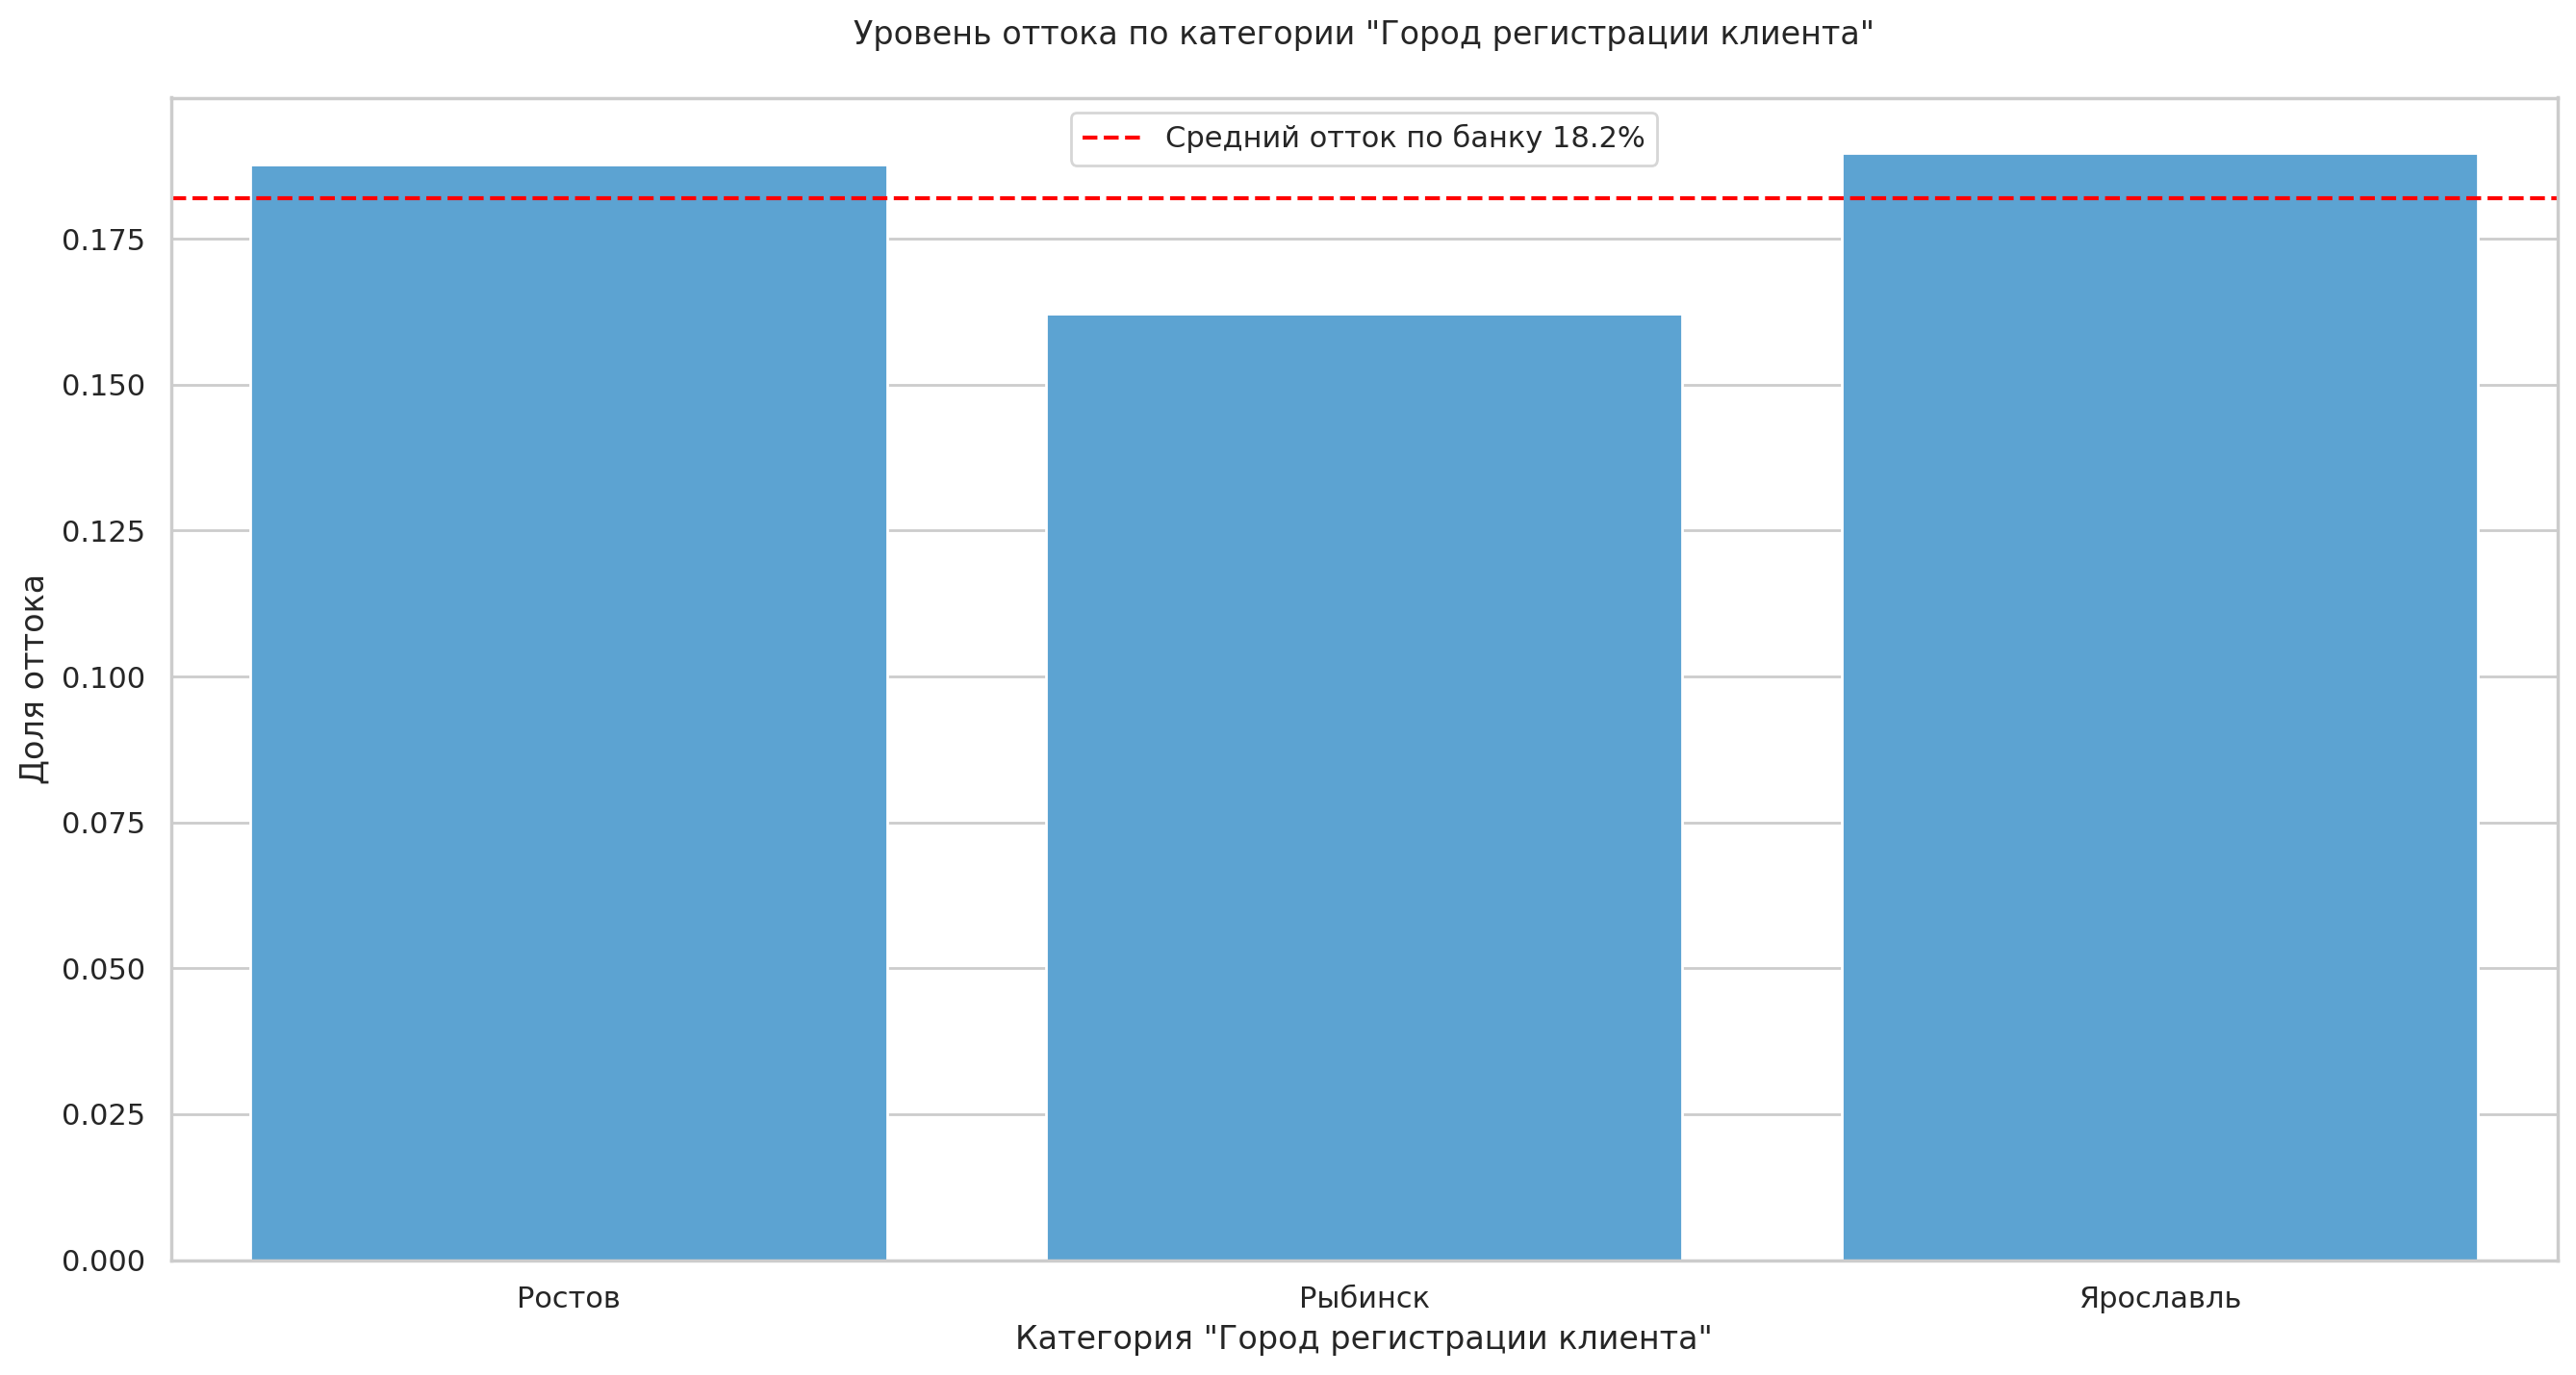

In [28]:
# Построим barplot для столбца city
discrete_categorical_columns_barplot(df, 'city', 'Город регистрации клиента', avg_churn)

На графике видно, что в Ростове и Ярославле уровень оттока клиентов немного превышает средний по банку, в то время как в Рыбинске он немного ниже среднего. В целом можно заключить, что город проживания клиента не оказывает значительного влияния на уровень оттока.

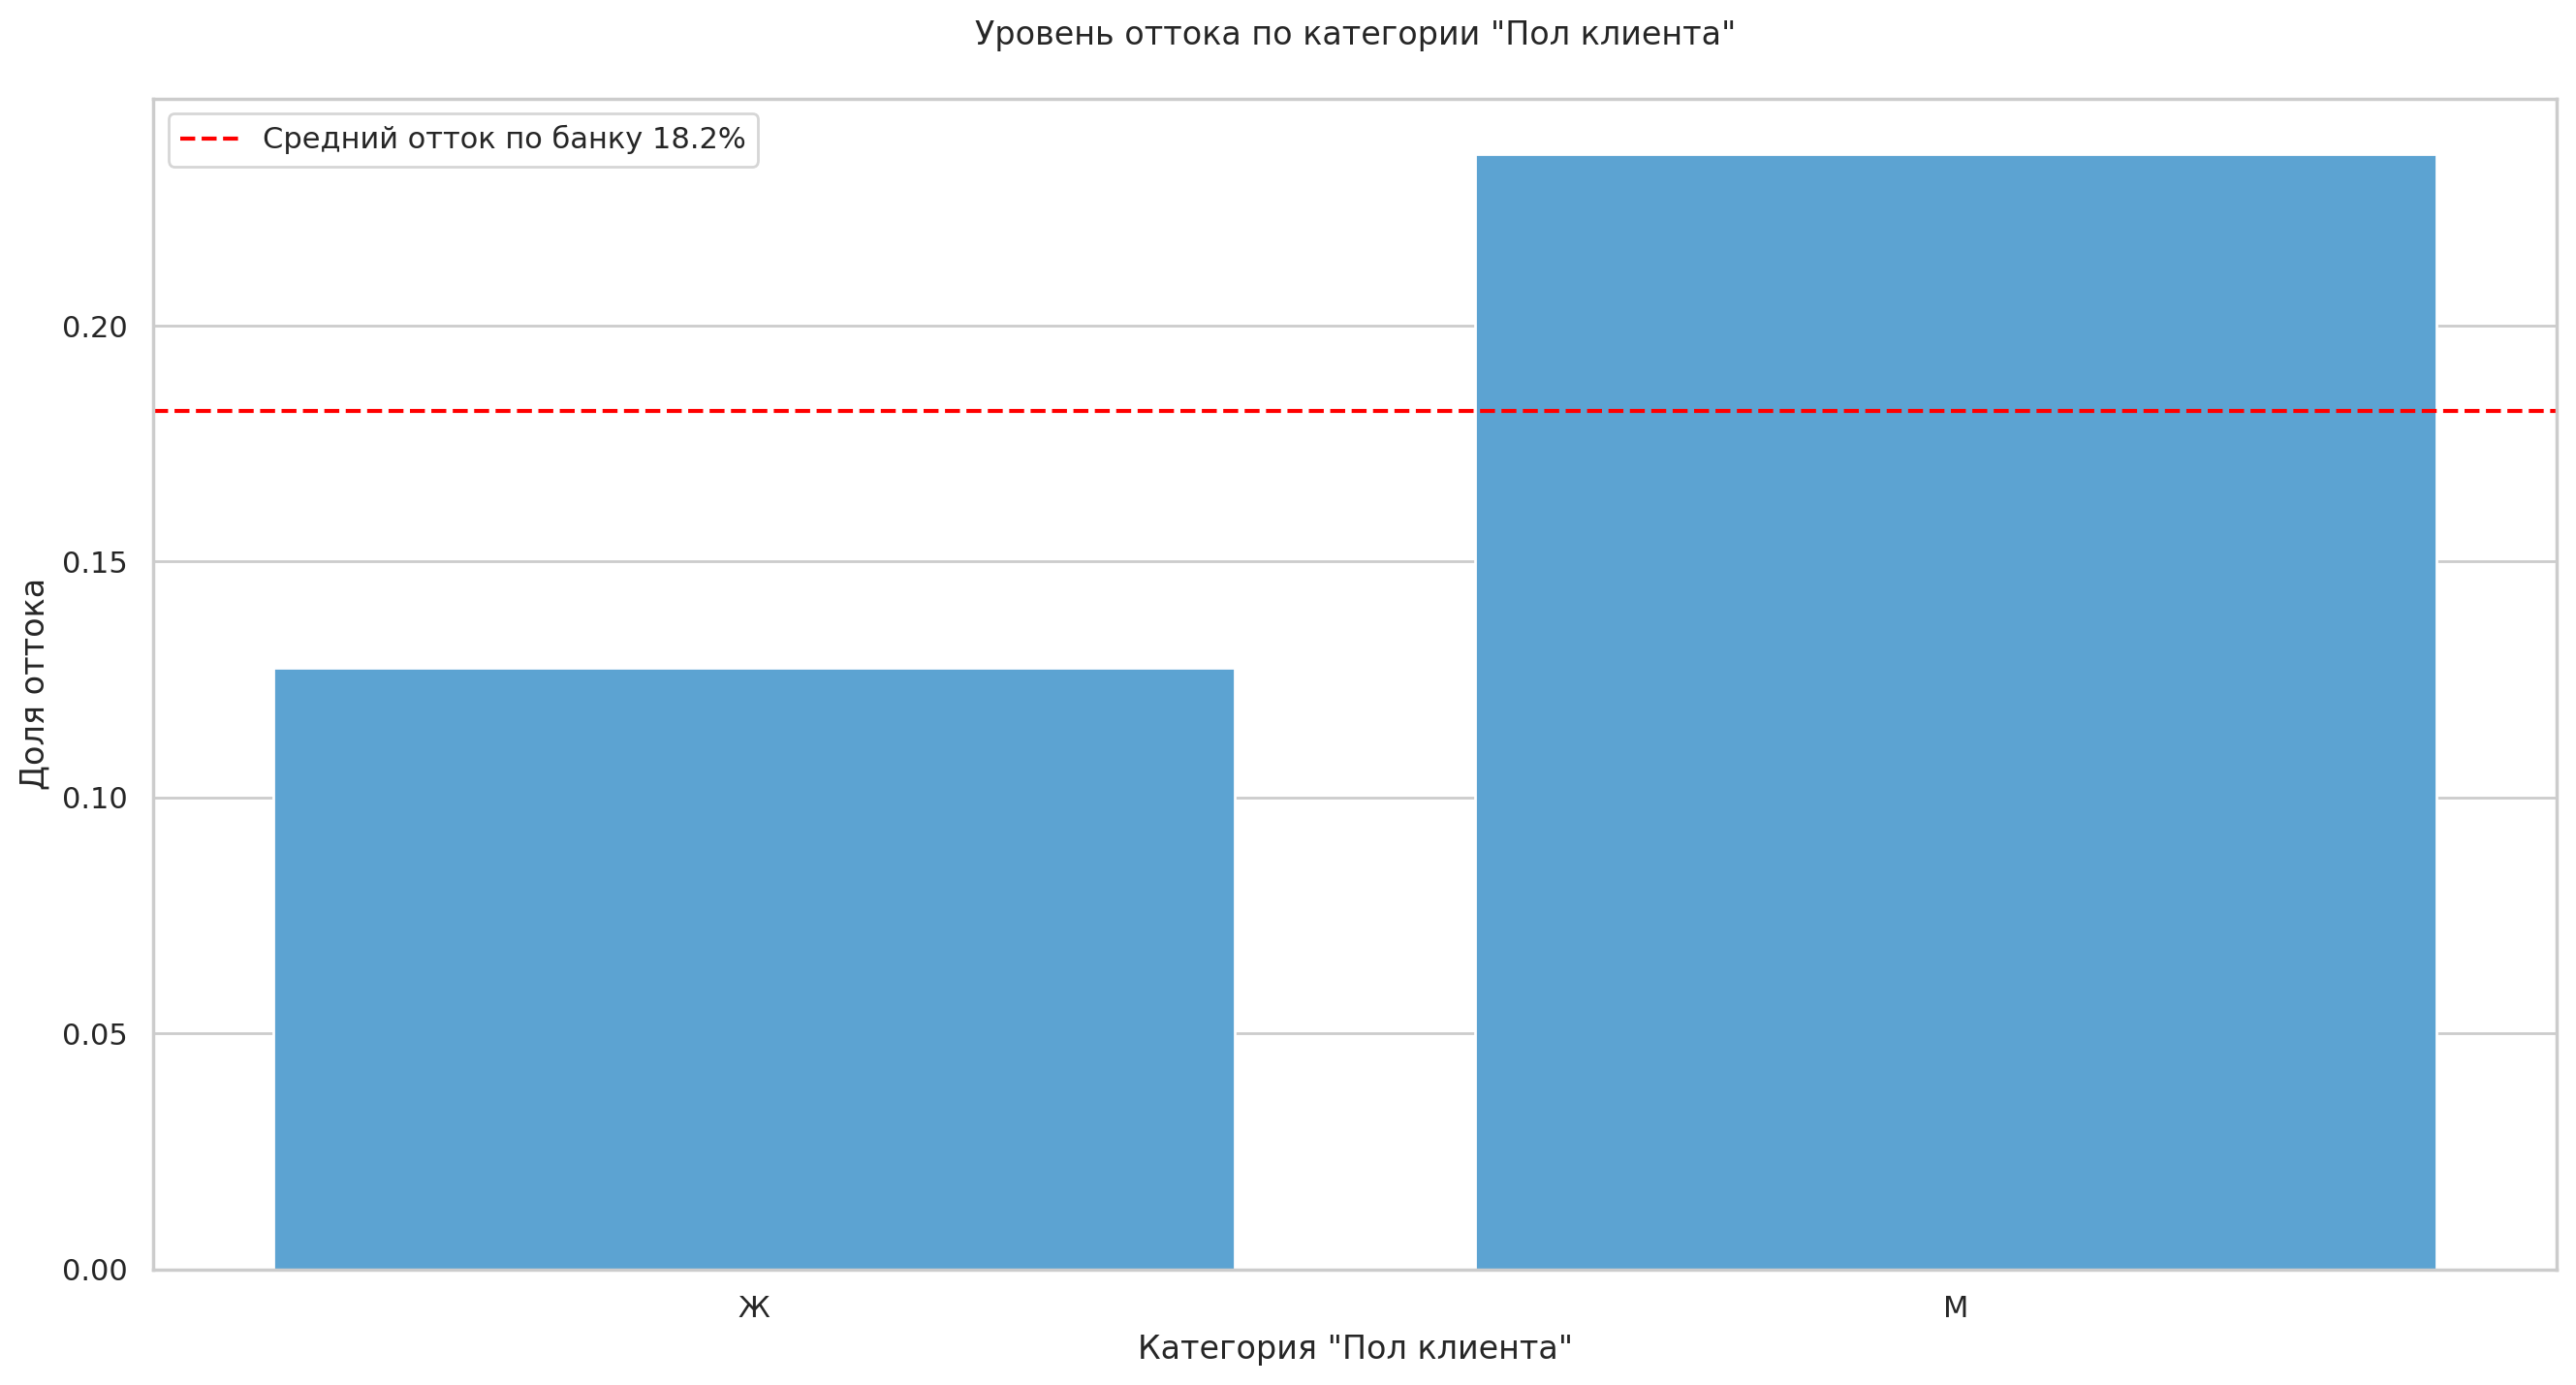

In [29]:
# Построим barplot для столбца gender
discrete_categorical_columns_barplot(df, 'gender', 'Пол клиента', avg_churn)

Следует отметить, что отток мужчин составляет около 23%, что выше среднего по банку, в то время как отток женщин составляет примерно 13% и находится ниже среднего уровня. Это позволяет сделать вывод, что банк теряет клиентов-мужчин почти в два раза чаще, чем клиентов-женщин.

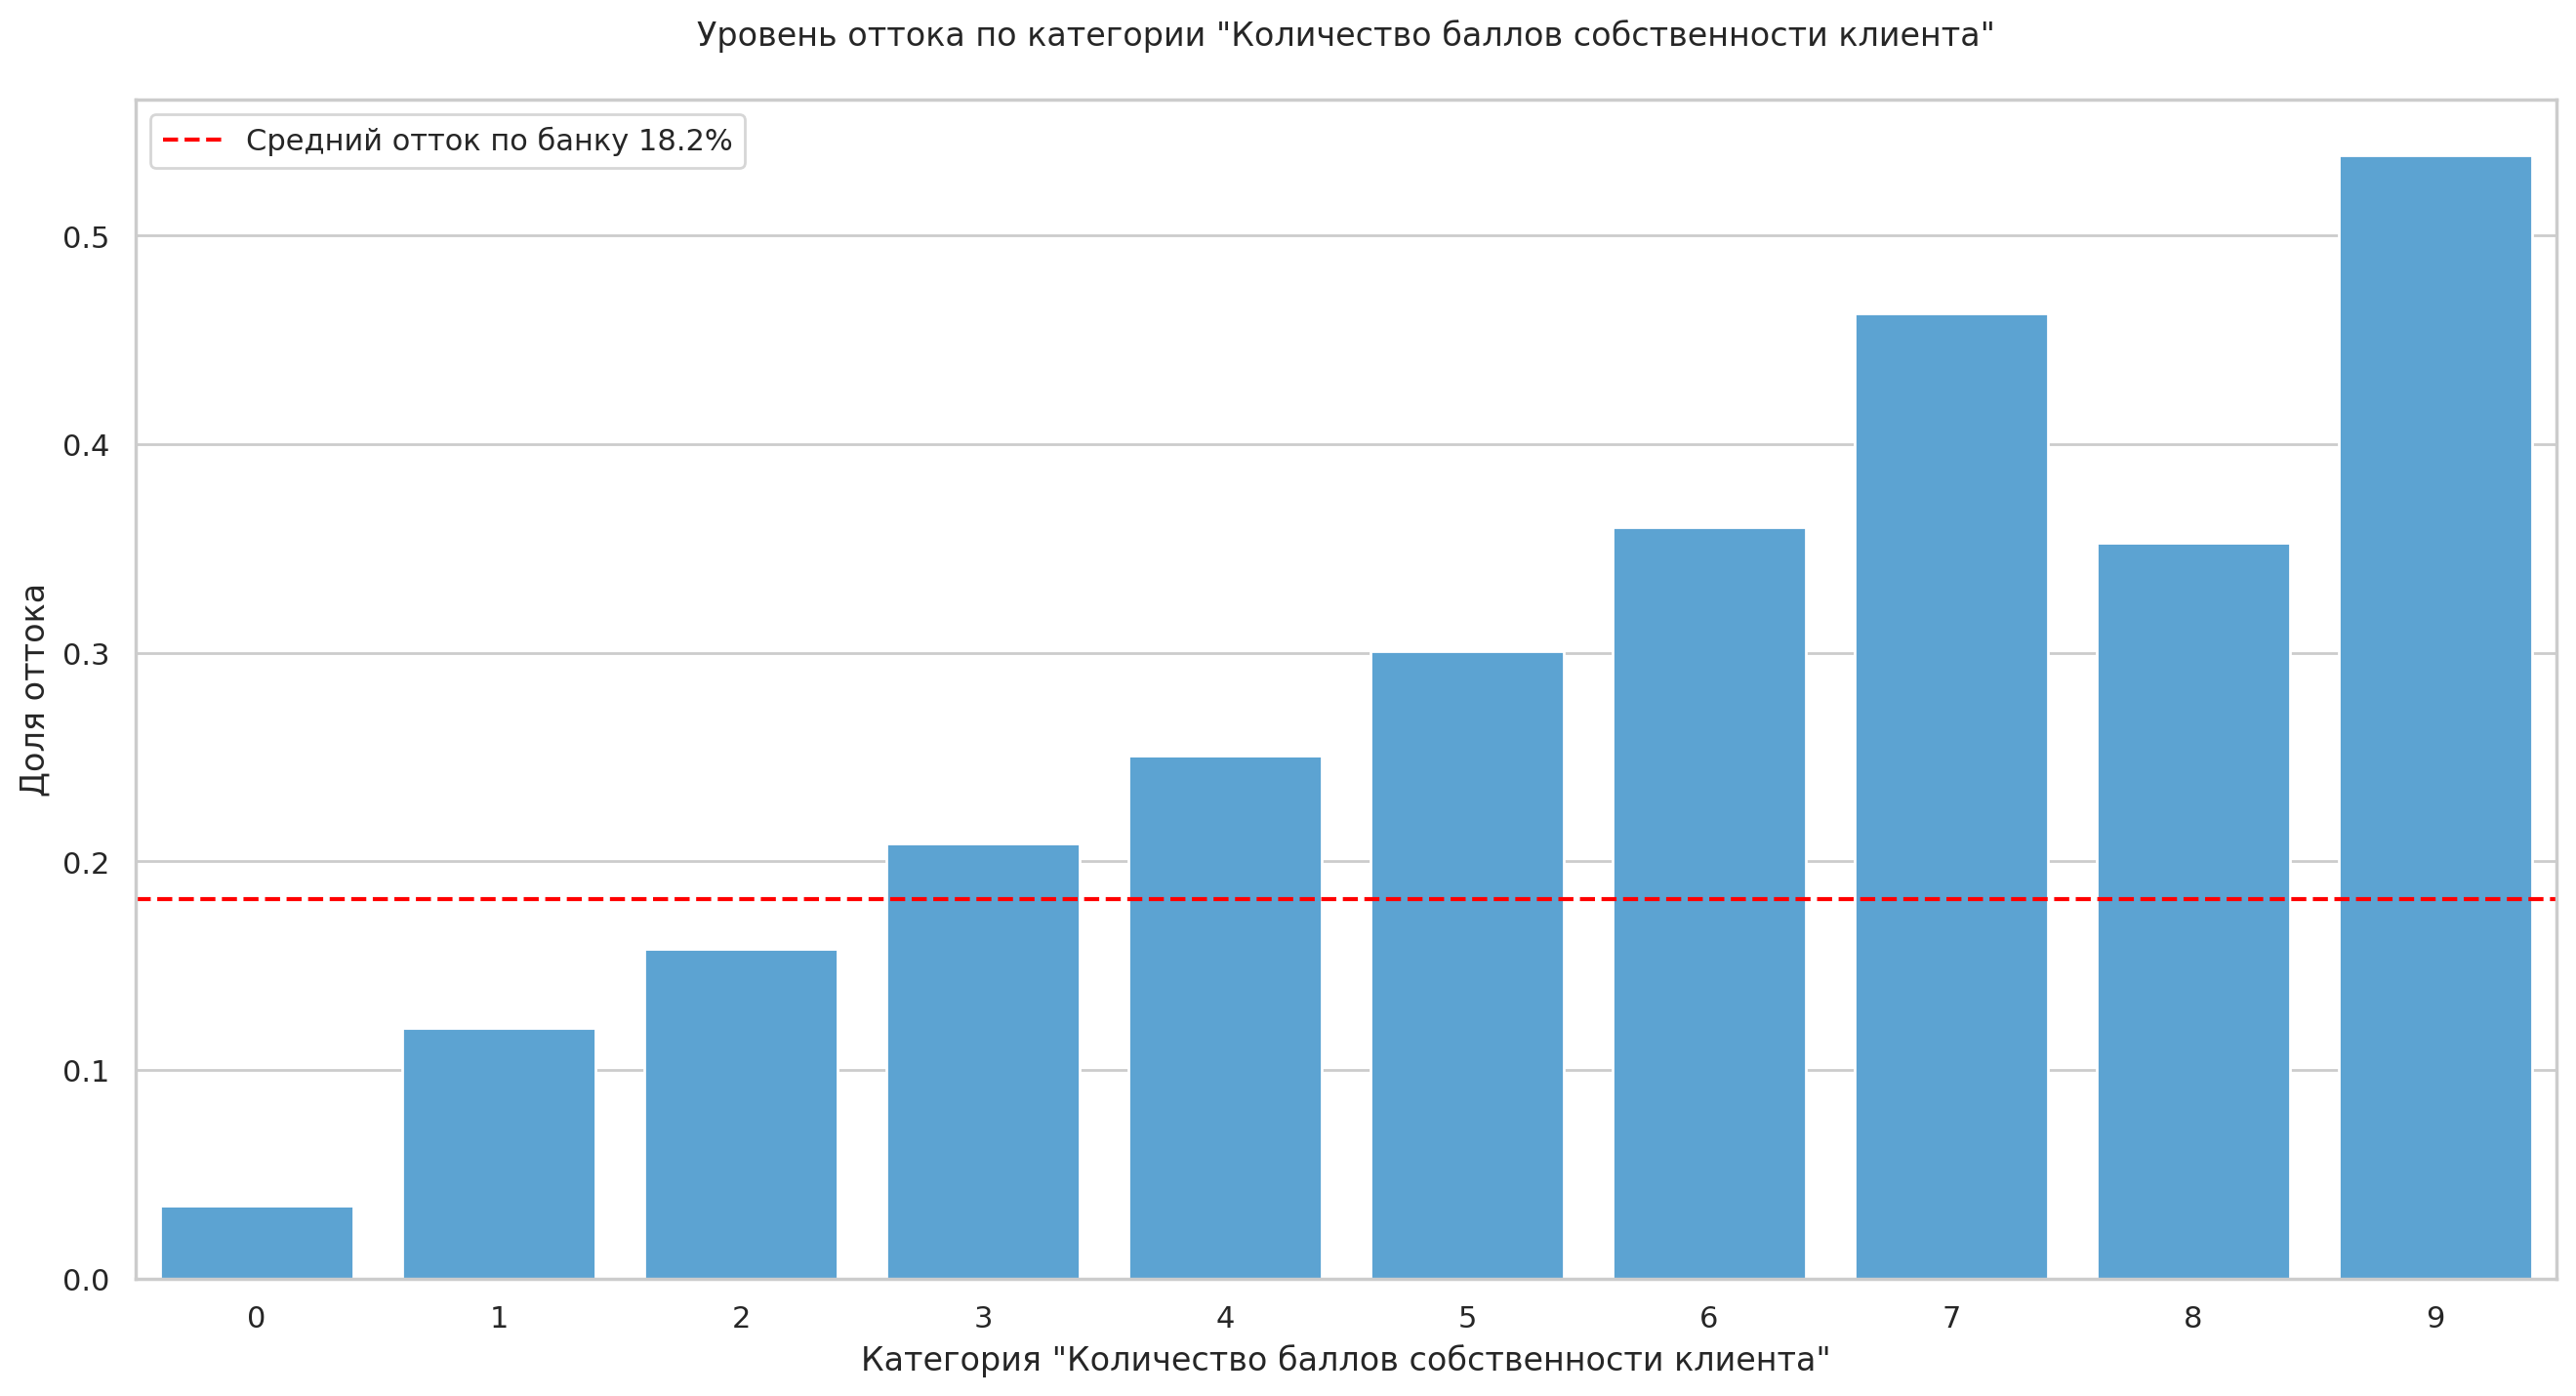

In [30]:
# Построим barplot для столбца equity
discrete_categorical_columns_barplot(df, 'equity', 'Количество баллов собственности клиента', avg_churn)

На графике четко видно, что с увеличением количества баллов собственности клиентов возрастает и процент оттока. 
* В категории от 0 до 2 баллов процент оттока ниже среднего по банку.
* Однако начиная с 3 баллов и выше, процент оттока превышает средний уровень по банку.

Отток клиентов с высоким баллом собственности может значительно негативно сказаться на благополучии банка.

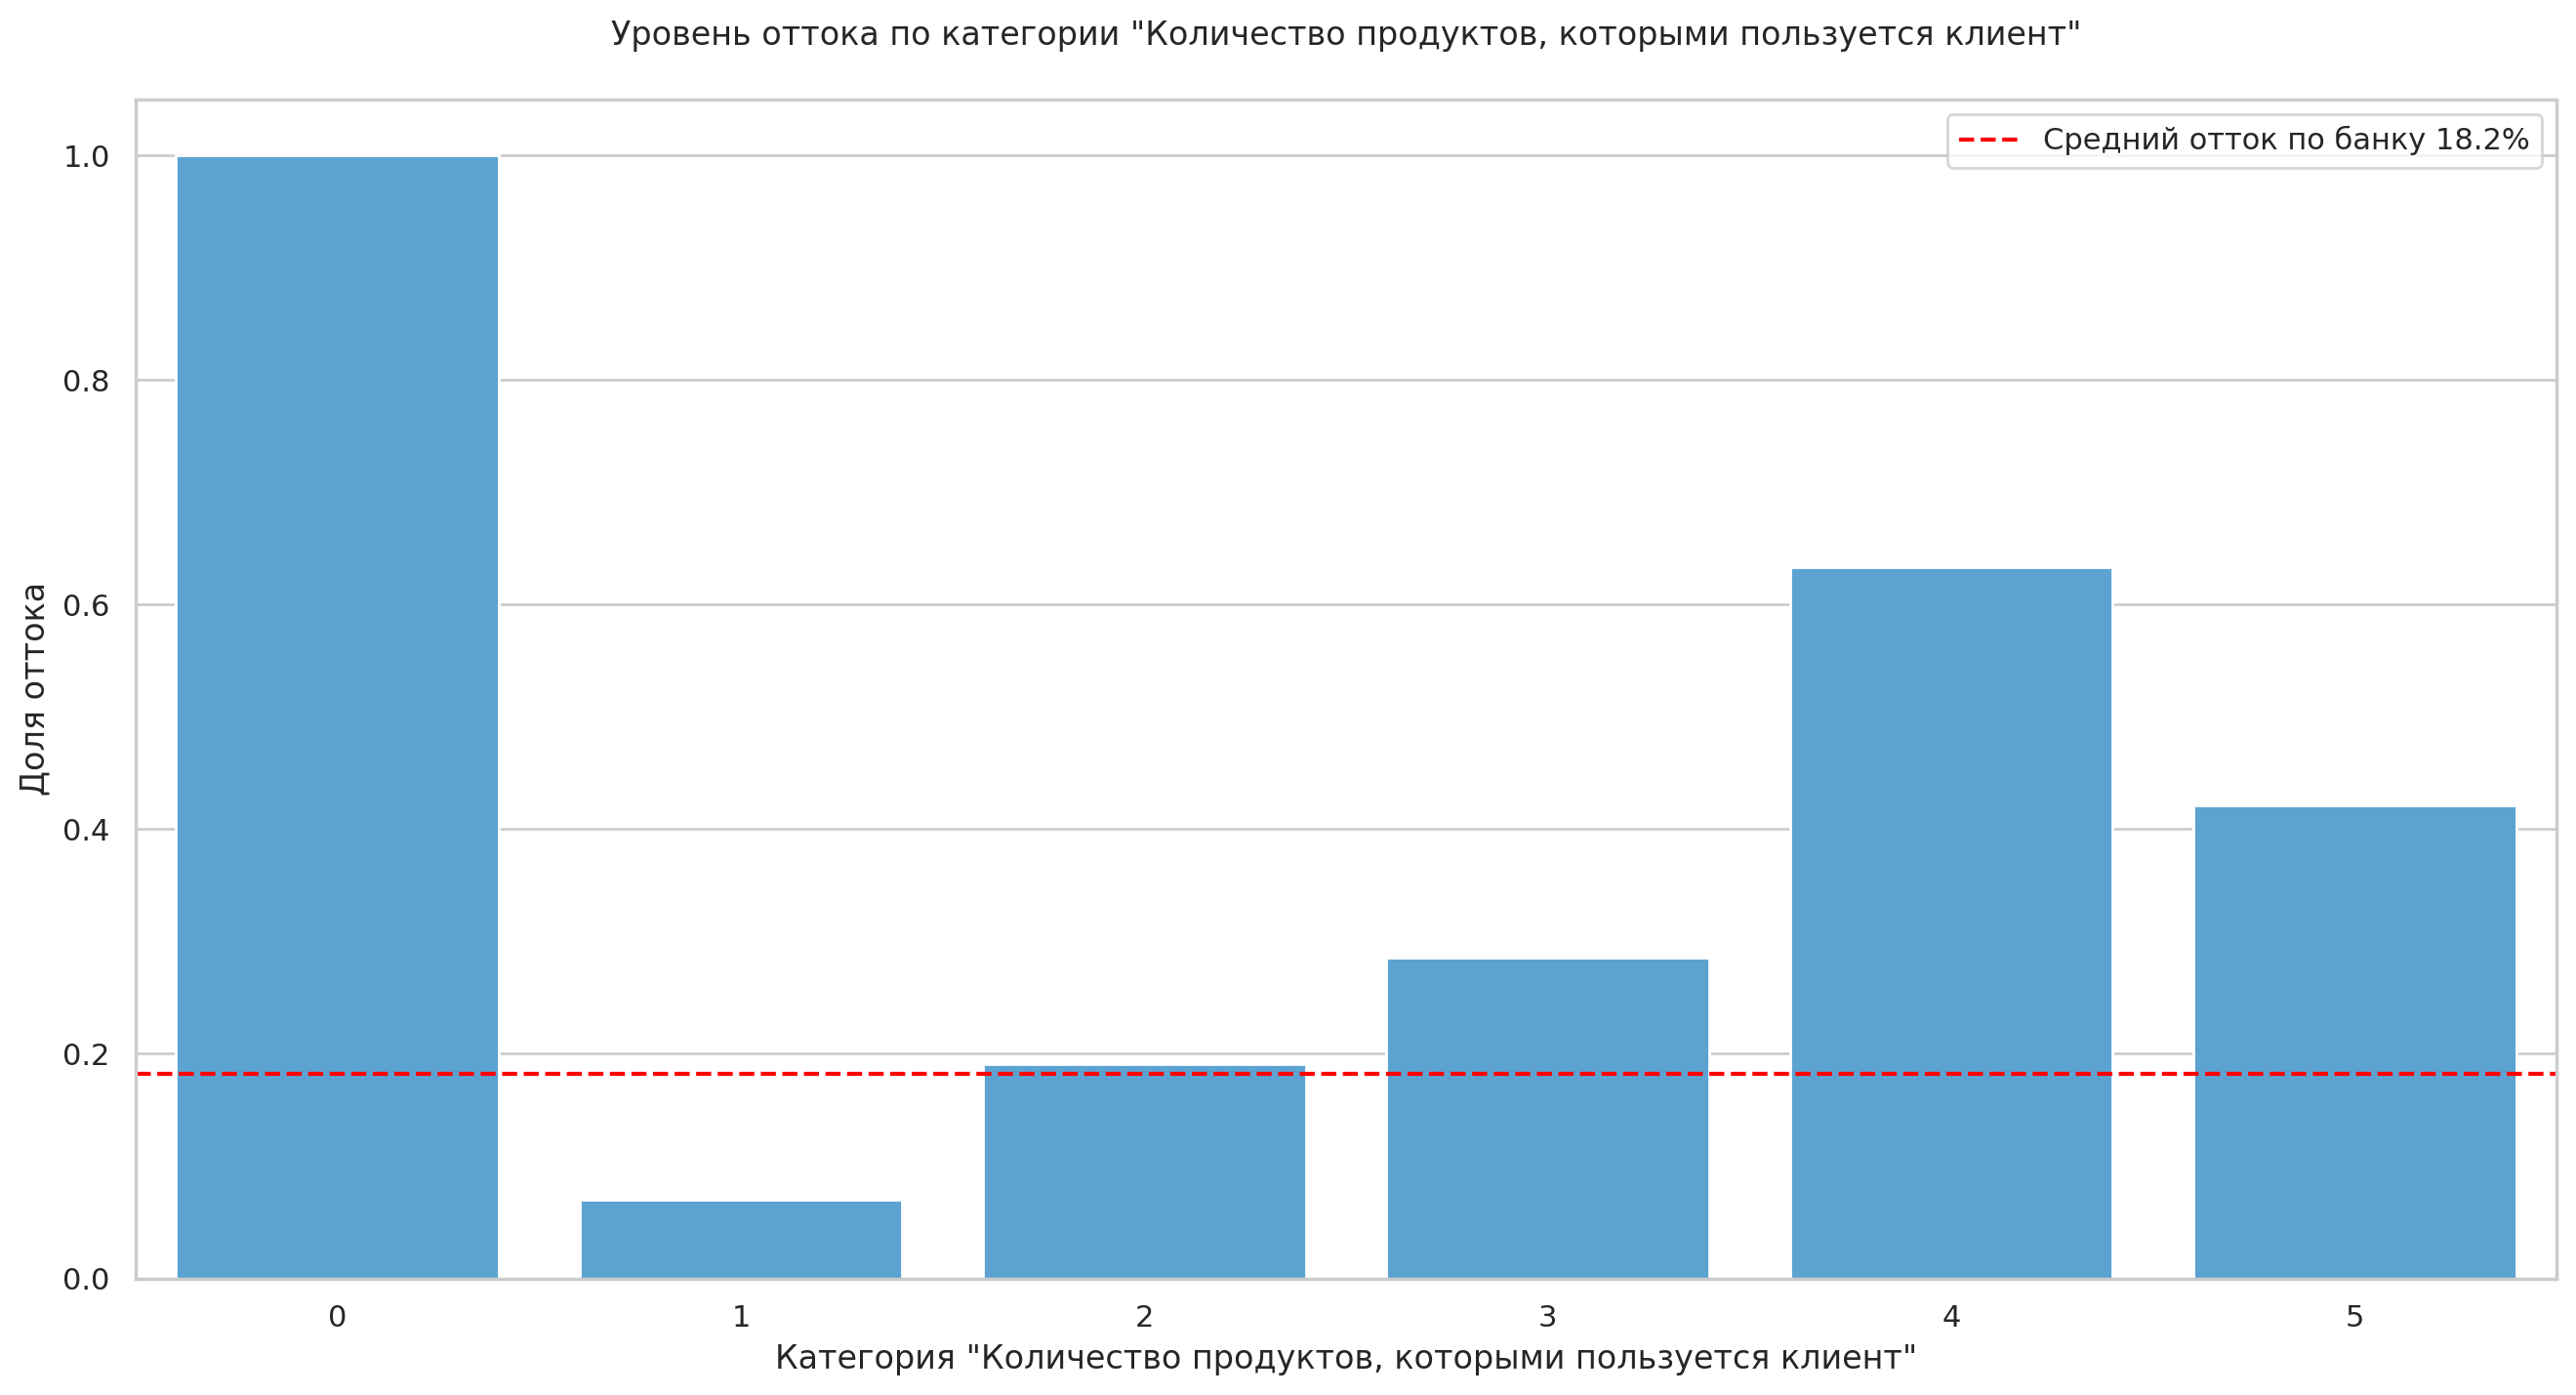

In [31]:
# Построим barplot для столбца products
discrete_categorical_columns_barplot(df, 'products', 'Количество продуктов, которыми пользуется клиент', avg_churn)

Получаем подозрительные 100% оттока клиентов у которых 0 продуктов. Проверим таких клиентов.

In [32]:
# Выводим всех клиентов с 0 продуктов
df[df['products']==0]

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


У нас есть всего один клиент, у которого 0 продуктов. Это, скорее всего, техническая ошибка, и таким клиентом можно пренебречь. Удалим этого клиента.

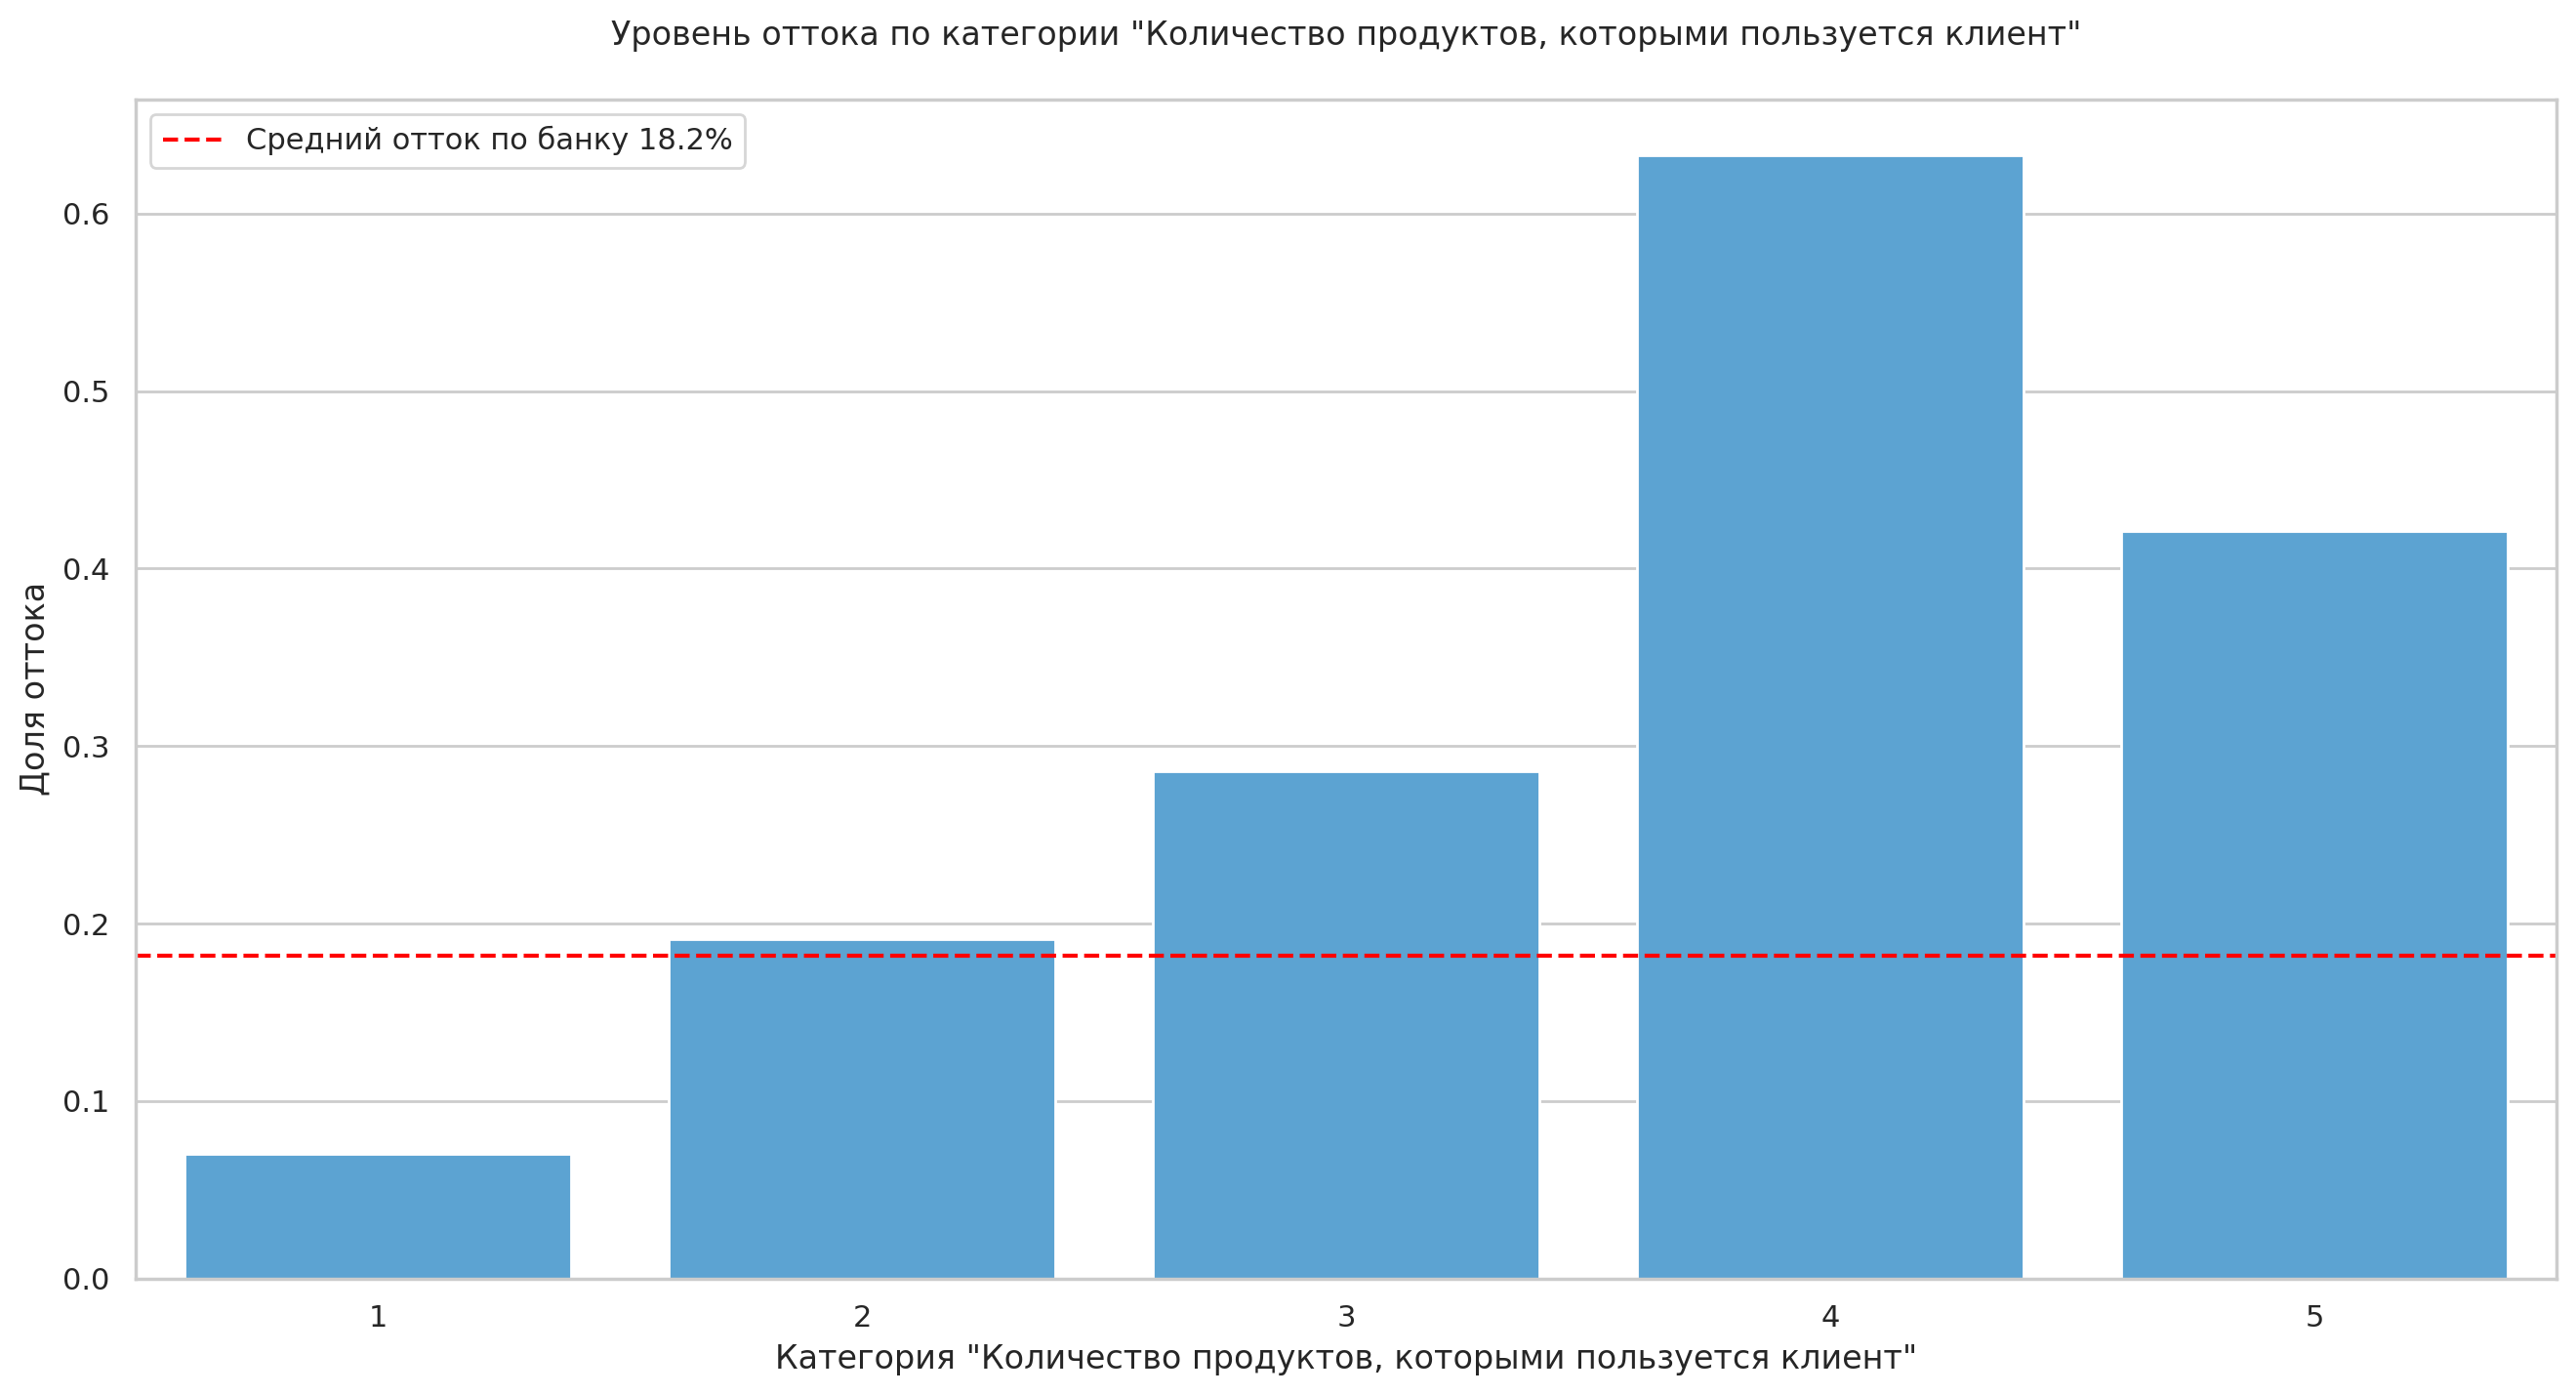

In [33]:
# Построим barplot для столбца products

# Предварительно удалим клиента с 0 продуктов
df_clean = df[df['products'] != 0]

discrete_categorical_columns_barplot(df_clean, 'products', 'Количество продуктов, которыми пользуется клиент', avg_churn)

На графике хорошо заметно, что с ростом количества продуктов, которыми пользуется клиент, растет и процент оттока. Только клиенты, имеющие 1 продукт, имеют процент оттока ниже среднего по банку; отток клиентов, имеющих 2 продукта, равен среднебанковскому, а вот клиенты, имеющие от 3 до 5 продуктов, имеют отток выше среднего по банку. Пик доли оттока у клиентов, имеющих 4 продукта: у таких клиентов отток составляет около 61%.

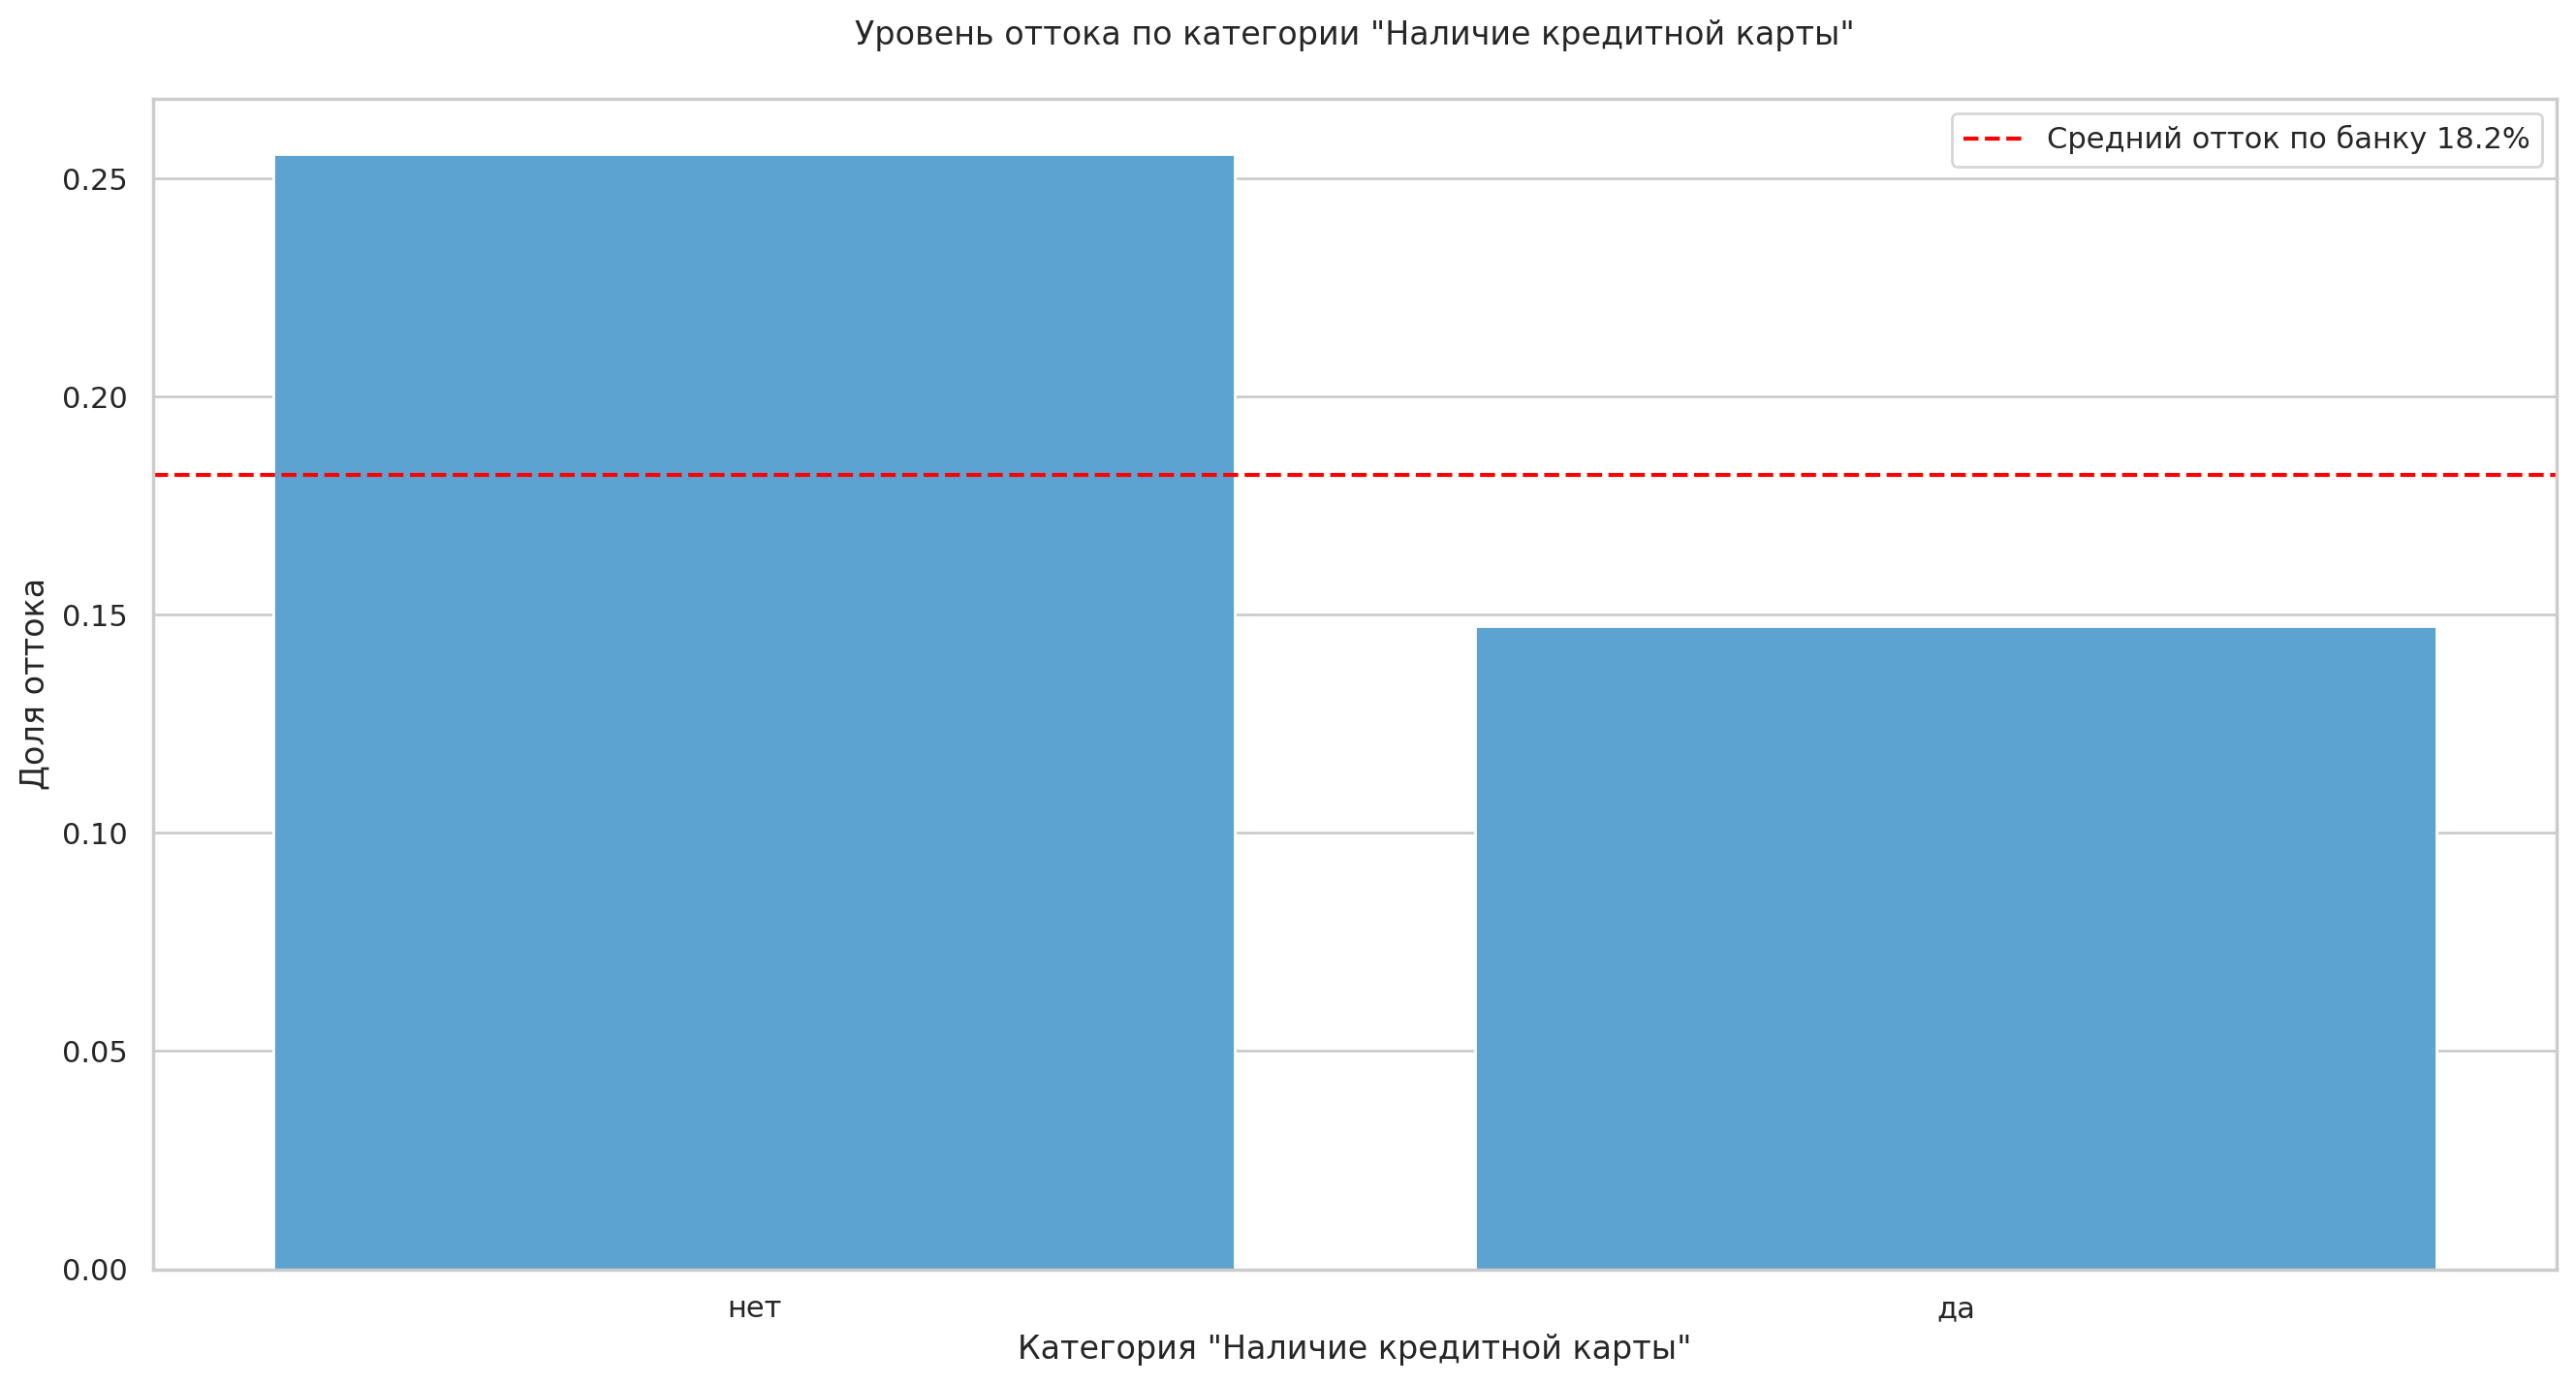

In [34]:
# Построим barplot для столбца credit_card
discrete_categorical_columns_barplot(df, 'credit_card', 'Наличие кредитной карты', avg_churn)

Здесь стоит отметить, что отток клиентов, не имеющих кредитную карту, составляет примерно 26%, что выше среднего по банку. В то же время отток клиентов с кредитной картой равен примерно 15%, что ниже среднего уровня по банку. Таким образом, отток клиентов без кредитной карты превышает отток клиентов с кредитной картой почти на 58%. Это указывает на то, что банку выгодно предоставлять кредитные карты клиентам для повышения их удержания.

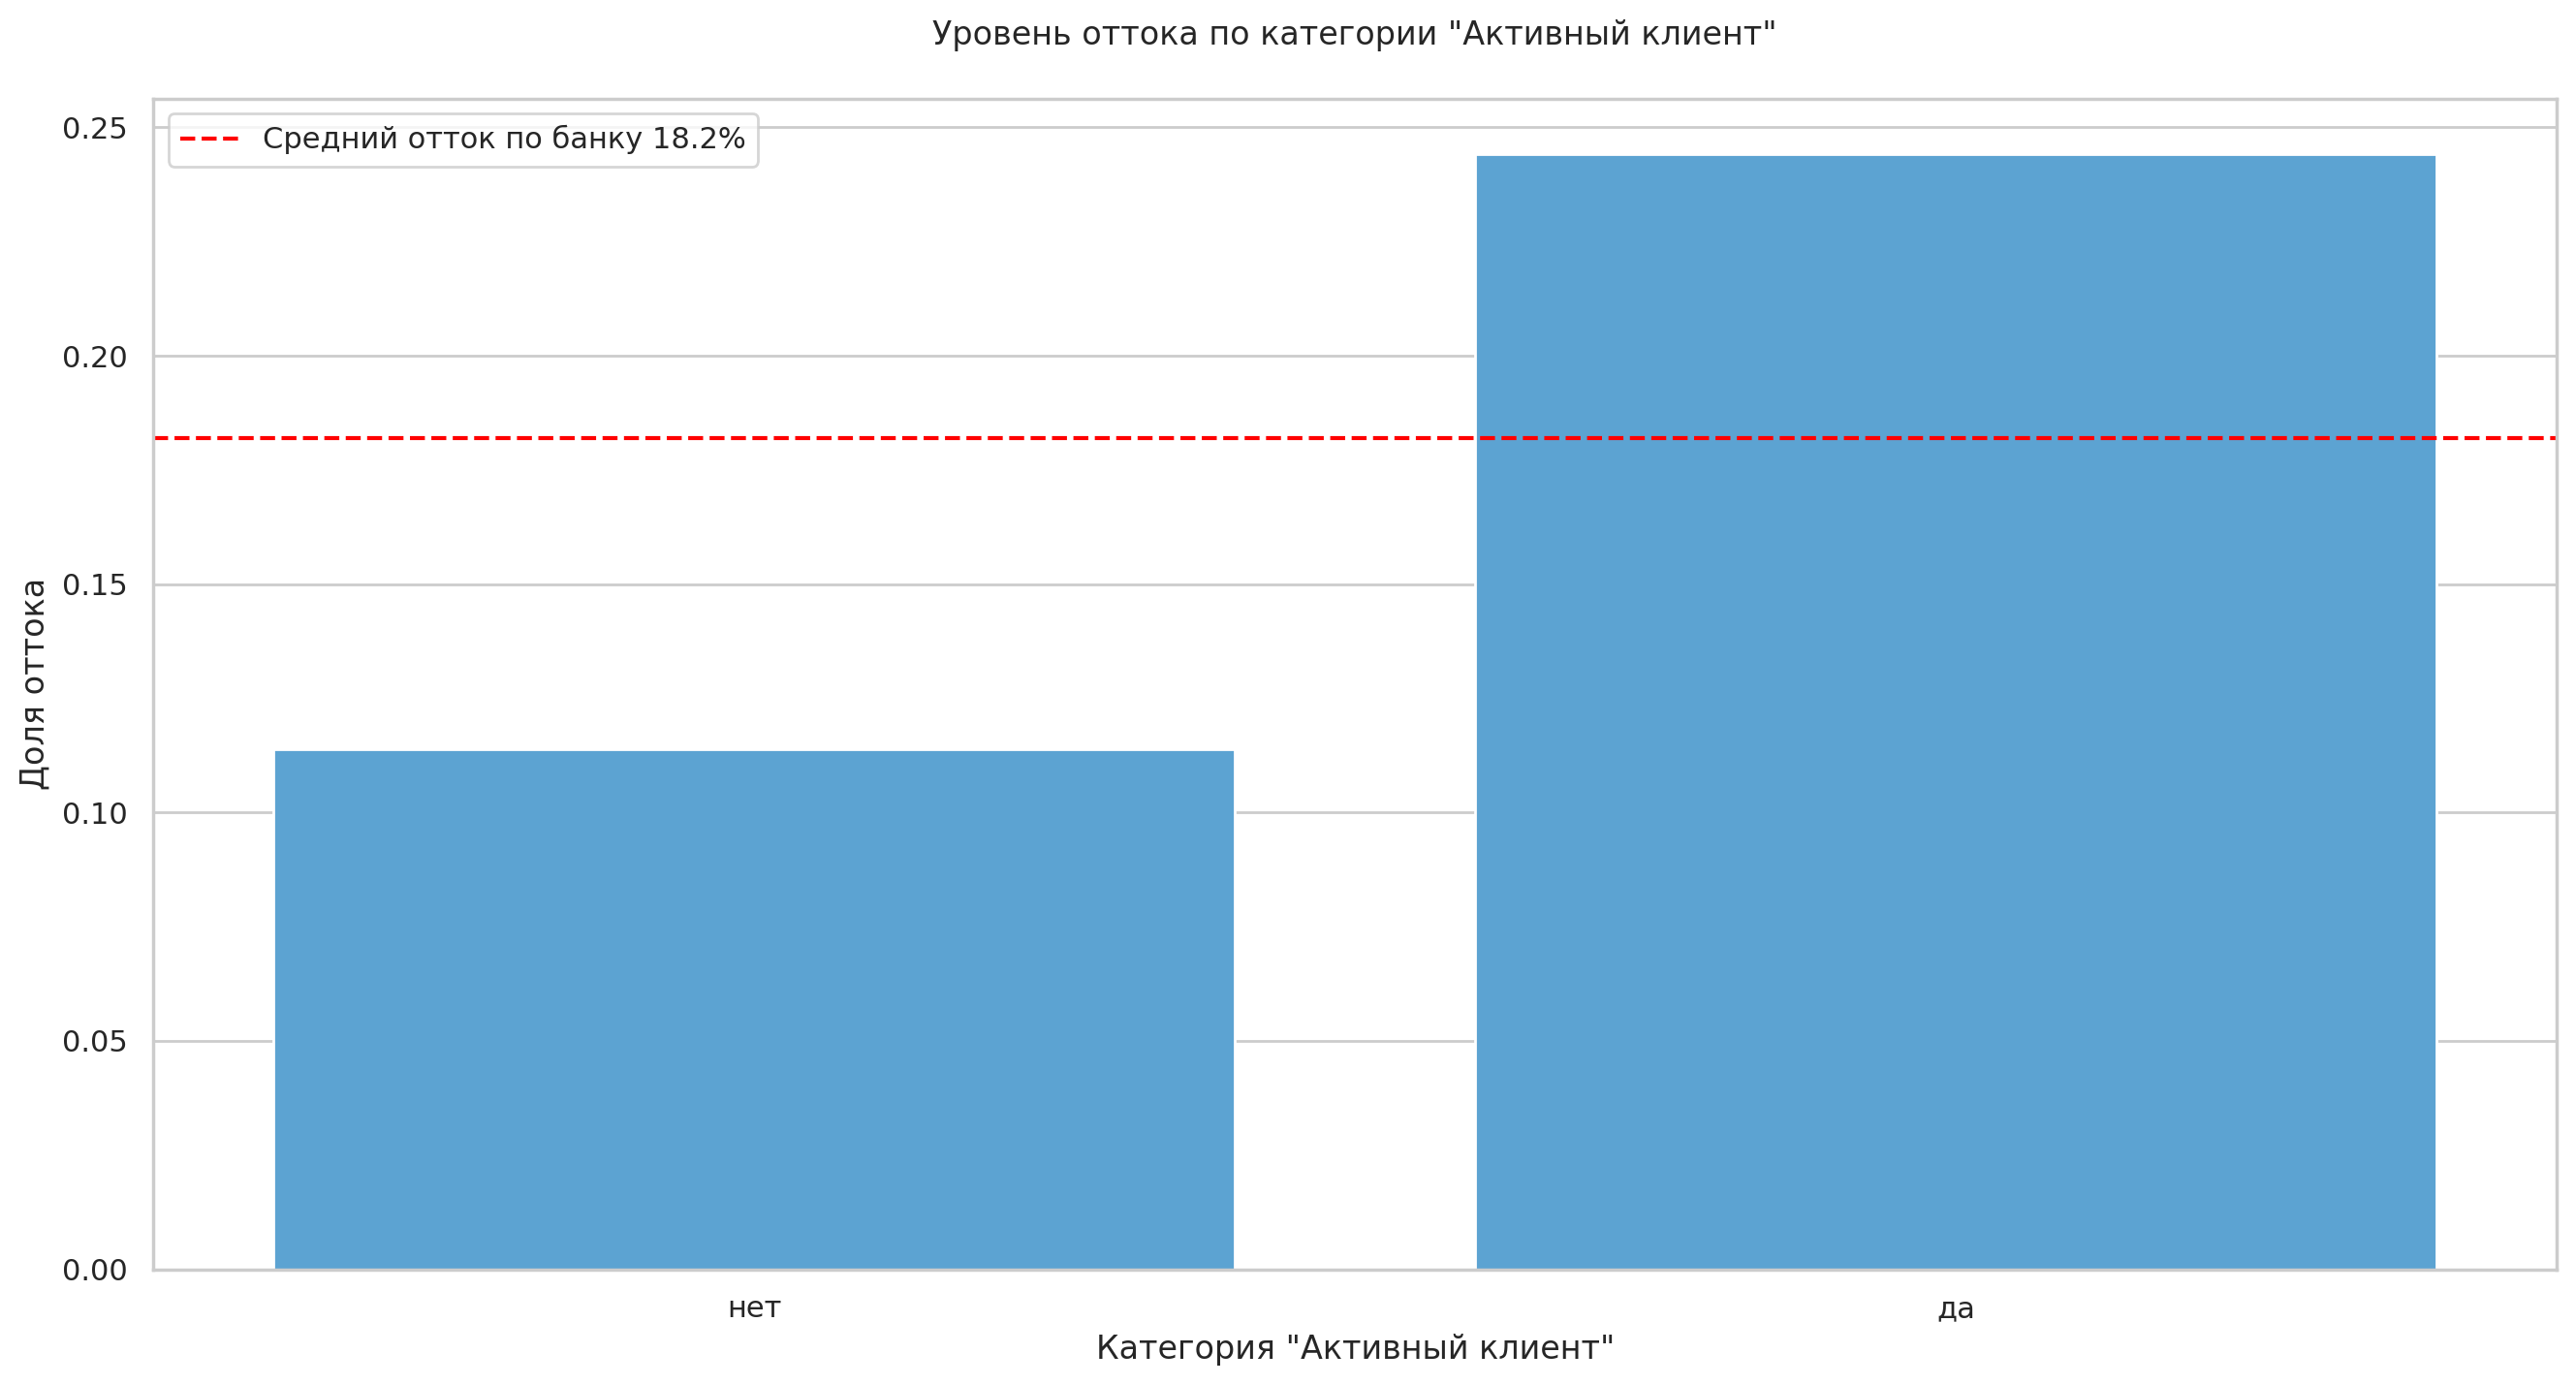

In [35]:
# Построим barplot для столбца last_activity
discrete_categorical_columns_barplot(df, 'last_activity', 'Активный клиент', avg_churn)

Мы наблюдаем, что отток активных клиентов составляет примерно 25%, что выше среднего уровня по банку. В то же время отток неактивных клиентов составляет всего 12%. Таким образом, отток активных клиентов в два раза больше, чем у неактивных, что может негативно сказаться на финансовом состоянии банка. Это также может свидетельствовать о том, что клиенты недовольны уровнем сервиса и уходят из регионального банка к федеральным учреждениям в поисках лучших условий и более выгодных предложений.

### Анализ портретов клиентов в разрезе оттока (Группировка по оттоку churn).
1. Создание временного DataFrame: Заменим заглушку в балансе (-1) на NaN, чтобы она не повлияла на расчет средних значений и медиан.
2. Посчитаем средние значения для признаков `balance`, `est_salary`, `age` и  `score`,  а также вычислим относительную разницу для них.
3. Посчитаем медиану для признаков `balance`, `est_salary`, `equity` и `products`, заполнив относительную разницу значением None.
4. Посчитаем моду для признаков`city`, `gender`, `credit_card` и `last_activity`, заполнив относительную разницу значением None.
5. Объединим получившиеся DataFrame в один по вертикали.
6. Сделаем выводы.

In [36]:
# Создаем временный датафрейм с заменой заглушки на NaN
df_temp = df.copy()
df_temp['balance'] = df_temp['balance'].replace(-1, np.nan)
df_temp.head(5)

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


In [37]:
# Считаем среднее

# Группируем df по оттоку, считаем среднее и разворачиваем таблицу, переименовываем индексы в русские слова
df_grouped_mean = (
    df_temp.groupby('churn')[['balance', 'est_salary', 'age', 'score']]
    .mean()
    .transpose()
    .rename(index={
        'balance': 'Средний баланс',
        'est_salary': 'Средняя зарплата',
        'age': 'Средний возраст',
        'score': 'Средний балл кредитного скоринга'
    })
    .reset_index()
    .rename(columns={'index': 'Показатель'})  # Переименовываем столбец с показателями
)

# Переименовываем столбцы с оттоком 
df_grouped_mean = df_grouped_mean.rename(columns={
    False: 'Не отток',  
    True: 'Отток'
})

# Преобразовываем значения к int
df_grouped_mean[['Отток', 'Не отток']] = df_grouped_mean[['Отток', 'Не отток']].astype('int')

# Считаем относительную разницу
df_grouped_mean['Относительная разница'] = (
    (df_grouped_mean['Не отток'] - df_grouped_mean['Отток']) / df_grouped_mean['Не отток'] * 100).round(1).abs()

df_grouped_mean

churn,Показатель,Не отток,Отток,Относительная разница
0,Средний баланс,733982,1133993,54.5
1,Средняя зарплата,147783,148243,0.3
2,Средний возраст,43,41,4.7
3,Средний балл кредитного скоринга,845,863,2.1


In [38]:
# Считаем медиану

# Группируем df по оттоку, считаем медиану и разворачиваем таблицу, переименовываем индексы в русские слова
df_grouped_median = (
    df_temp.groupby('churn')[['balance', 'est_salary', 'equity', 'products']]
    .median()
    .transpose()
    .rename(index={
        'balance': 'Медианный баланс',
        'est_salary': 'Медианная зарплата',
        'equity': 'Медианное количество баллов собственности',
        'products': 'Медианное количество продуктов'
    })
    .reset_index()
    .rename(columns={'index': 'Показатель'})  # Переименовываем столбец с показателями
)

# Переименовываем столбцы с оттоком 
df_grouped_median = df_grouped_median.rename(columns={
    False: 'Не отток',  
    True: 'Отток'
})

# Преобразовываем значения к int
df_grouped_median[['Отток', 'Не отток']] = df_grouped_median[['Отток', 'Не отток']].astype('int')

# Заполняем относительную разницу значением None
df_grouped_median['Относительная разница'] = '-'

df_grouped_median

churn,Показатель,Не отток,Отток,Относительная разница
0,Медианный баланс,475382,782410,-
1,Медианная зарплата,118257,125390,-
2,Медианное количество баллов собственности,3,4,-
3,Медианное количество продуктов,2,2,-


In [39]:
# Вычисляем моду

# Cоздаем список столбцов, по которым надо найти моду
mode_column_lst = ['city', 'gender', 'credit_card', 'last_activity']

# Разбиваем датафреймы по признаку churn
df_churn_0 = df[df['churn'] == 0]
df_churn_1 = df[df['churn'] == 1]

# Создаем словарь для хранения мод для churn_0
mode_dict_churn_0 = {}

# Заполняем словарь для churn_0
for elem in mode_column_lst:
    mode_dict_churn_0[elem] = df_churn_0[elem].mode().tolist()[0]  # Преобразуем моду в значение

# Создаем словарь для хранения мод для churn_1
mode_dict_churn_1 = {}

# Заполняем словарь для churn_1
for elem in mode_column_lst:
    mode_dict_churn_1[elem] = df_churn_1[elem].mode().tolist()[0]  # Преобразуем моду в значение

# Преобразовываем словари в датафрейм, переименовываем индексы в русские слова
mode_df = pd.DataFrame({
    'Не отток': mode_dict_churn_0,
    'Отток': mode_dict_churn_1
}).rename(index={
        'city': 'Мода по городу',
        'gender': 'Мода по полу',
        'credit_card': 'Мода по наличию кредитной карты',
        'last_activity': 'Мода по активности'
    }).reset_index().rename(columns={'index': 'Показатель'})

# Заполняем относительную разницу значением None
mode_df['Относительная разница'] = '-'

mode_df

,Показатель,Не отток,Отток,Относительная разница
0,Мода по городу,Ярославль,Ярославль,-
1,Мода по полу,Ж,М,-
2,Мода по наличию кредитной карты,1,1,-
3,Мода по активности,0,1,-


In [40]:
# Объединяем три датафрема по вертикали
result_df = pd.concat(
    [df_grouped_mean, df_grouped_median, mode_df],
    axis=0,
    ignore_index=True  # Сбрасываем старые индексы
)

result_df

,Показатель,Не отток,Отток,Относительная разница
0,Средний баланс,733982,1133993,54.5
1,Средняя зарплата,147783,148243,0.3
2,Средний возраст,43,41,4.7
3,Средний балл кредитного скоринга,845,863,2.1
4,Медианный баланс,475382,782410,-
5,Медианная зарплата,118257,125390,-
6,Медианное количество баллов собственности,3,4,-
7,Медианное количество продуктов,2,2,-
8,Мода по городу,Ярославль,Ярославль,-
9,Мода по полу,Ж,М,-


Мы наблюдаем, что среди клиентов, покинувших банк, преобладают более обеспеченные клиенты. Медианный баланс ушедших клиентов составляет 783 908 рублей, в то время как у лояльных клиентов он равен 475 410 рублей. Также стоит отметить, что зарплата ушедших клиентов выше: медиана составляет 124 966 рублей по сравнению с 118 227 рублями у оставшихся клиентов. 

Кроме того, ушедшие клиенты имеют большее количество активов и более высокий кредитный рейтинг. Они также проявляют большую активность в использовании банковских услуг. Интересно, что среди ушедших клиентов наблюдается преобладание мужчин.

**Портрет лояльного клиента:**

1. Средний баланс: *Лояльные клиенты имеют высокий средний баланс — 733 982 рублей.*
2. Средняя зарплата: *Средняя зарплата лояльных клиентов составляет 147 783 рублей, что указывает на стабильный уровень дохода.*
3. Средний возраст: *Лояльные клиенты в среднем немного старше (43 года)*.
4. Кредитный скоринг: *У лояльных клиентов кредитный скоринг составляет 845, что говорит о хорошем финансовом поведении и низком уровне кредитных рисков*.
5. Медианный баланс: *Медианный баланс составляет 475 382 рублей, что подтверждает наличие значительных средств у большинства клиентов*.
6. Медианная зарплата: *Медианная зарплата в 118 257 рублей также указывает на стабильный доход.*
7. Баллы собственности: *Лояльные клиенты имеют в среднем 3 балла собственности, что может указывать на наличие активов*.
8. Количество продуктов: *Лояльные клиенты используют в среднем 2 продукта*.
9. Город (мода): *Большинство лояльных клиентов проживает в Ярославле*.
10. Пол (мода): *Среди лояльных клиентов преобладают женщины*.
11. Кредитная карта: *Лояльные клиенты чаще имеют кредитные карты*.
12. Активность: *Лояльные клиенты демонстрируют низкую активность, что может говорить о том, что они  не нуждаются в частых операциях*.

**Портрет уходящего клиента:**
1. Средний баланс: *Уходящие клиенты имеют значительно более высокий средний баланс — 1 133 993 рубля.*
2. Средняя зарплата: *Средняя зарплата уходящих клиентов составляет 148 243 рубля, что лишь немного выше, чем у лояльных клиентов.*
3. Средний возраст: *Уходящие клиенты немного моложе (41 год)*.
4. Кредитный скоринг: *Уходящие клиенты имеют более высокий кредитный скоринг — 863*.
5. Медианный баланс: *Медианный баланс у уходящих клиентов значительно больше составляет 782 410 рублей, что также подтверждает наличие значительных средств*.
6. Медианная зарплата: *Медианная зарплата уходящих клиентов равна 125 390 рублей, что указывает на наличие хороших доходов.*
7. Баллы собственности: Уходящие клиенты имеют в среднем 4 балла собственности, это в два раза больше чем у лояльных клиентов, что говорит нам о том, что уходящие клиенты более благополучны.
8. Количество продуктов: Уходящие клиенты также используют в среднем 2 продукта, также как и у лояльных клиентов.
9. Город (мода): Уходящие клиенты также проживают в Ярославле.
10. Пол (мода): Среди уходящих клиентов преобладают мужчины.
11. Кредитная карта: Уходящие клиенты также имеют кредитные карты.
12. Активность: Уходящие клиенты демонстрируют высокую активность, что говорит нам об их потребности часто пользоваться банковскими услугами. 

Главные отличия: уходящие клиенты активнее пользуются банковскими услугами, они более финансово благополучны (имеют более высокий баланс и больше баллов собственности). Также уходящие клиенты чаще являются мужчинами и немного моложе лояльных клиентов.

### Корреляционный анализ признака churn с другими признаками. Расчет корреляции Phik. Интерпретируем силу связи на основе полученных коэффициентов по Чеддоку.
1. С помощью библиотеки `phik` строим матрицу корреляций, фильтруем и отбираем интересующий нас признак churn (отток).
2. В соответствии со шкалой Чеддока присваиваем уровень корреляции.
3. Строим тепловую карту корреляции.
4. Делаем выводы.

In [41]:
# Cтроим матрицу корреляции с помощью бибилиотеки phik
phik_overview = df.phik_matrix(interval_cols=['score','age', 'balance', 'est_salary'])

In [42]:
# Оставляем только строку с индексом churn
phik_overview = phik_overview.loc[['churn']] 

# Разворачиваем таблицу, удалеям столбец churn, сортируем по убыванию
phik_overview = phik_overview.drop(
    columns=['churn']).transpose().sort_values(by='churn', ascending=False)
phik_overview.columns = ['Корреляция']

# Объявляем фукцию для определения уровня по шкале Чеддока
def cheddock_correlation(value):
    if value >= 0.7:
        return 'Очень высокая'
    elif value >= 0.5:
        return 'Высокая'
    elif value >= 0.3:
        return 'Умеренная'
    elif value >= 0.2:
        return 'Слабая'
    elif value >= 0.1:
        return 'Очень слабая'
    else:
        return 'Практически отсутствует'
    
# Применяем функцию    
phik_overview['Уровень корреляции по Чеддоку'] = phik_overview['Корреляция'].apply(cheddock_correlation)

phik_overview

,Корреляция,Уровень корреляции по Чеддоку
products,0.441363,Умеренная
equity,0.352726,Умеренная
last_activity,0.261174,Слабая
score,0.229572,Слабая
gender,0.218799,Слабая
credit_card,0.202997,Слабая
age,0.191653,Очень слабая
est_salary,0.047661,Практически отсутствует
balance,0.024701,Практически отсутствует
city,0.016811,Практически отсутствует


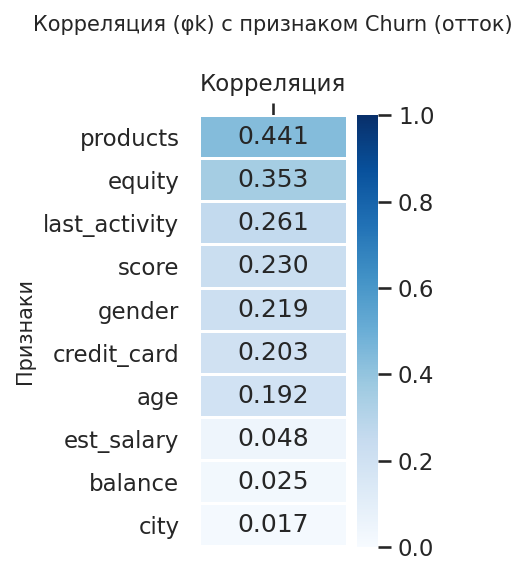

In [43]:
# Создаем фигуру с нужным размером
plt.figure(figsize=(3, 4))

# Создаем тепловую карту для одного ряда (churn)
ax = sns.heatmap(pd.DataFrame(phik_overview['Корреляция']),  
                 annot=True,       # Показывать значения в ячейках
                 fmt=".3f",        # Формат чисел (3 знака после запятой)
                 cmap="Blues",     # Цветовая схема
                 vmin=0,           # Минимальное значение шкалы
                 vmax=1,           # Максимальное значение шкалы
                 cbar=True,        # Показать цветовую шкалу
                 linewidths=1)    # Толщина линий между ячейками

# Настройка внешнего вида
ax.set_title('Корреляция (φk) с признаком Churn (отток)', pad=20, fontsize=10)
ax.set_ylabel('Признаки', fontsize=10)

ax.xaxis.set_ticks_position('top')  # Перемещаем подписи оси X наверх

plt.tight_layout()
plt.show()

Наибольшее влияние на отток клиентов оказывают количество продуктов (products) и количество баллов собственности (equity), что подтверждается умеренной корреляцией, равной 0.44 и 0.35 соответственно. Остальные факторы демонстрируют слабую связь с оттоком клиентов. Это свидетельствует о том, что в таких признаках, как баланс клиента, возраст и кредитный скоринг, наблюдаются нелинейные зависимости. В этих характеристиках можно выделить определенные интервалы, в которых отток клиентов превышает средние показатели по банку.

**Выводы по этапу EDA:**
Этап EDA выявил тревожные симптомы для банка, связанные с уходом обеспеченных клиентов:
* Ушедшие клиенты, в среднем, имеют более высокий уровень дохода и больше активов.
* Клиенты с балансом свыше 750 000 рублей чаще покидают банк.
* Клиенты с 3 и более баллами собственности также имеют более высокий уровень оттока.
* Активные клиенты уходят в 2 раза чаще, чем неактивные.

Дополнительно стоит отметить, что банк теряет активных клиентов с хорошим кредитным скорингом и без кредитной карты:
* Высокий уровень оттока наблюдается у клиентов с кредитным скорингом от 830 до 940 баллов, при этом максимальный отток зафиксирован в диапазоне 860-870 баллов.
* Клиенты без кредитной карты уходят на 58% чаще, чем те, у кого она есть.
* Чем больше продуктов у клиента (особенно 3 и более), тем выше уровень оттока, достигающий пика в 61% при наличии 4 продуктов.

Также были выявлены характерные демографические и географические признаки повышенного оттока:
* Мужчины покидают банк в 2 раза чаще, чем женщины.
* Группы риска: молодые клиенты (25–35 лет) и клиенты в возрасте 50–60 лет.
* Город проживания незначительно влияет на отток, хотя уровень оттока в Ярославле и Ростове чуть выше среднего по банку.

Рекомендации по проверке гипотез:
1. Сравнение доходов: Провести анализ различий в уровне дохода между клиентами, которые ушли из банка, и теми, кто остался. Это поможет определить, теряет ли банк прибыльную аудиторию.
2. Анализ баланса: Проверить гипотезу о том, что средний баланс на счетах ушедших клиентов превышает средний баланс оставшихся клиентов. Это даст представление о финансовом состоянии уходящих клиентов.
3. Кредитный скоринг: Оценить, действительно ли кредитный скоринг ушедших клиентов выше, чем у оставшихся. Это поможет понять, насколько банк теряет клиентов с хорошей кредитной историей.
4. Сравнение зарплат по регионам: Проверить гипотезу о том, что средняя зарплата клиентов в Ярославле выше, чем у клиентов в Рыбинске. Это может выявить региональные различия, влияющие на отток клиентов.

<a id="step_4"></a>
## Проверка статистических гипотез:
1. Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.
2. Проверка гипотезы: баланс у ушедших клинетов больше чем у оставшихся.
3. Проверка гипотезы: Кредитный скоринг у ушедших клиентов лучше чем у оставшихся.
4. Проверка гипотезы: Зарплата у клиентов в Ярославле больше чем у Клиентов в Рыбинске

Для проверки гипотезы будем использовать t-тест Стьюдента по следующим причинам:

1. Независимость выборок: Выборки являются независимыми.
2. Нормальность распределения: Если размер выборки большой (обычно n ≥ 30), то распределение выборочных средних будет близко к нормальному, даже если исходные данные ненормальны. В нашем случае выборки будут соответствовать этому правилу.
3. Проверка равенства выборок, если выборки отличается более чем на 25%, то применяем поправку Уэлча и устанавливаем equal_var=False.
4. Удаление выбросов: Перед тестом удалим выбросы с помощью межквартильного размаха.

Для сокращения строчек кода объявим кастомную функцию для проведения t-тестов.

In [44]:
# Объявляем кастомную функцию
def t_test(df, grouped_col, analyst_col, rus_name,
           group1_value, group2_value, alternative='two-sided'):
    
    # Удаляем выбросы для проведения t-теста
    q1 = df[analyst_col].quantile(0.25)
    q3 = df[analyst_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Удаление выбросов с помощью межквартильного размаха
    df_clean =  df[(df[analyst_col] >= lower_bound) & (df[analyst_col] <= upper_bound)]

    # Выделяем группы
    group1 = df_clean[df_clean[grouped_col] == group1_value][analyst_col]
    group2 = df_clean[df_clean[grouped_col] == group2_value][analyst_col]

    alpha = 0.05 # устанавливаем уровень статистической значимости
    # если p-value окажется меньше него, отвергнем нулевую гипотезу

    # Проверка на размер выборок
    if len(group1) > 30 and len(group2) > 30:
        print('Выборки больше 30, можно проводить t-тест Стьюдента')
        print()
        
      # Проверка на размер выборок
        size1 = len(group1)
        size2 = len(group2)

        # Проверяем условие различия по размеру более чем на 25%
        if abs(size1 - size2) / max(size1, size2) > 0.25:
            print(
                "Размеры выборок различаются более чем на 25%. Применяем поправку Уэлча, equal_var=False.")
            equal_var=False
        else:
            print("Размеры выборок не различаются более чем на 25%. Поправка Уэлча не нужна, equal_var=True")
            equal_var=True

        # Проводим t-тест
        results = st.ttest_ind(group1, group2, equal_var=equal_var, alternative=alternative)       
        print(f"ttest Стьюдента: p-value = {results.pvalue}")
        print()
        
        # Получаем результаты
        if results.pvalue < alpha:
            print('Статистически значимые различия обнаружены (p < 0.05)')
            print('Отвергаем нулевую гипотезу в пользу альтернативной')
        else:
            print('Статистически значимых различий не обнаружено (p ≥ 0.05)')
            print('Не получилось отвергнуть нулевую гипотезу')             
        print()

        # Дополнительная информация
        print(f"Средние значения групп:")
        print(f"- Группа 1: {group1.mean().round(2)}")
        print(f"- Группа 2: {group2.mean().round(2)}")
        print(f"Разница средних: {(group1.mean() - group2.mean()).round(2)}")

        # График
        plt.figure(figsize=(9, 5))
        sns.boxplot(x=grouped_col, y=analyst_col, data=df_clean)
        plt.title('Распределение между группами')
        plt.xlabel('Группа')
        plt.ylabel(rus_name)
        plt.show()    

    else:
        print('Одна или обе выборки меньше 30 проводить t-тест Стьюдента нельзя')

### Гипотеза № 1: 
**Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.**
Сформулируем гипотезы (двухстороння гипотеза):
* Нулевая гипотеза (H0): Средняя зарплата ушедших и оставшихся клиентов (est_salary) одинаковая.
* Альтернативная гипотеза (H1): Средняя зарплата ушедших и оставшихся клиентов (est_salary) разная.

Выборки больше 30, можно проводить t-тест Стьюдента

Размеры выборок различаются более чем на 25%. Применяем поправку Уэлча, equal_var=False.
ttest Стьюдента: p-value = 0.00012581801852203802

Статистически значимые различия обнаружены (p < 0.05)
Отвергаем нулевую гипотезу в пользу альтернативной

Средние значения групп:
- Группа 1: 122197.83
- Группа 2: 128647.22
Разница средних: -6449.39


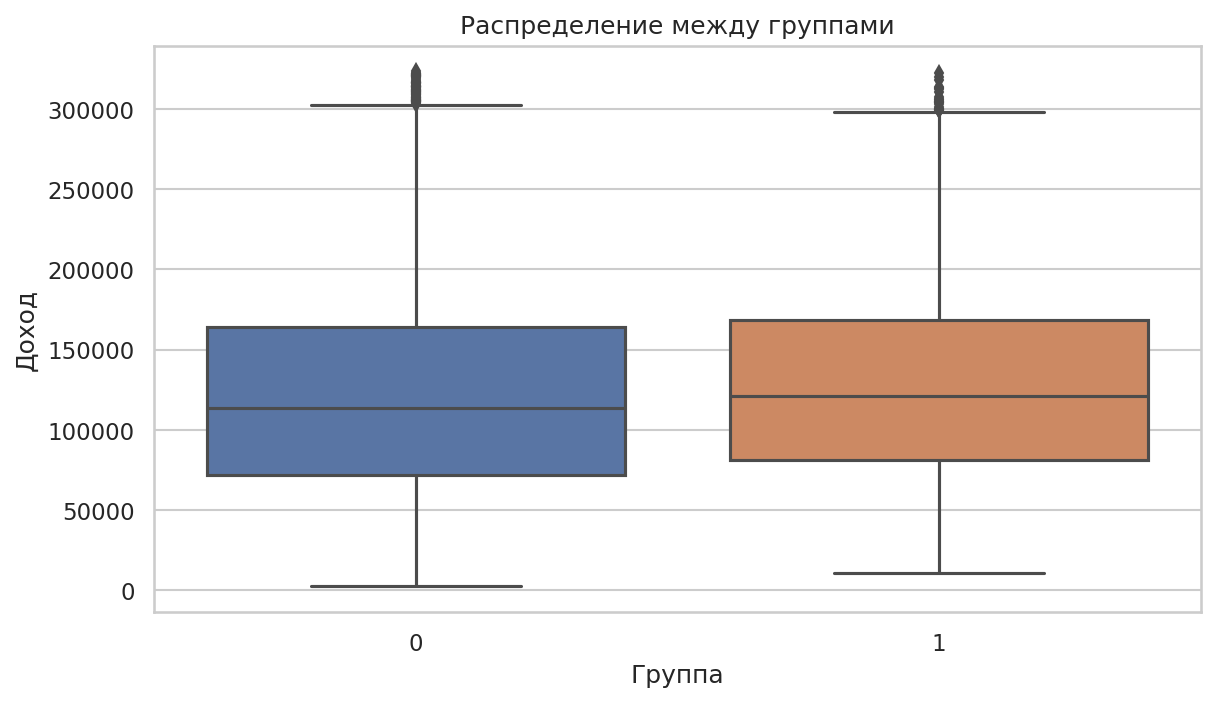

In [45]:
# Вызываем фукцию и передаем ей аргументы
# df = df
# grouped_col = 'churn'
# analyst_col = 'est_salary'
# rus_name = 'Доход'
# group1_value = 0 (лояльные клиенты)
# group2_value = 1 (ушедшие клиенты)
# alternative = 'two-sided' (тип альтернативной гипотезы)
t_test(df, 'churn', 'est_salary', 'Доход', 0, 1, alternative='two-sided')

Отвергаем нулевую гипотезу — **доходы групп различаются**. На графике мы видим что у ушедших клиентов  немного зарплата больше. Также стоит отметить, что ранее на гистограмме была зафиксирована граница, при которой уровень оттока клиентов превышал 100 000 рублей.

  ### Гипотеза № 2: 
**Проверка гипотезы: баланс у ушедших клиентов больше чем у оставшихся.**
Сформулируем гипотезы (одностороняя гипотеза):
* Нулевая гипотеза (H0): Средний баланс (balance) у ушедших не больше чем у оставшихся клиентов.
* Альтернативная гипотеза (H1): Средний баланс (balance) у ушедших клиентов больше чем у оставшихся.

Выборки больше 30, можно проводить t-тест Стьюдента

Размеры выборок различаются более чем на 25%. Применяем поправку Уэлча, equal_var=False.
ttest Стьюдента: p-value = 1.0262270780937428e-46

Статистически значимые различия обнаружены (p < 0.05)
Отвергаем нулевую гипотезу в пользу альтернативной

Средние значения групп:
- Группа 1: 766432.06
- Группа 2: 570667.62
Разница средних: 195764.44


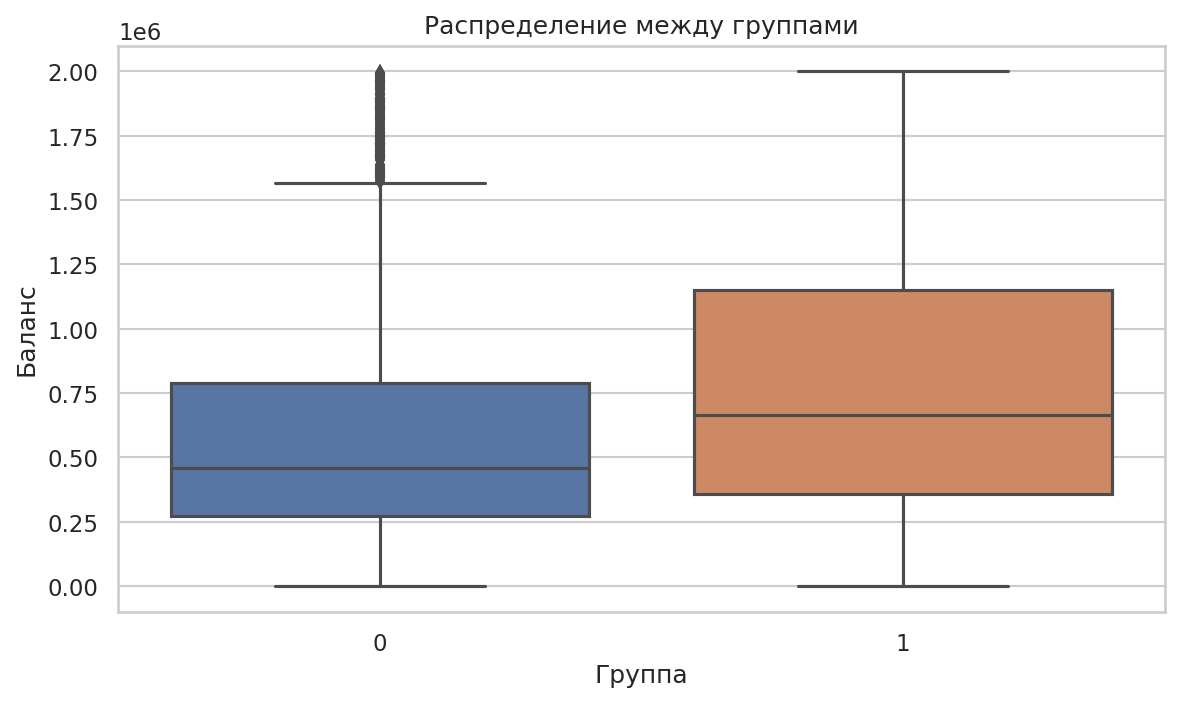

In [46]:
# Вызываем фукцию и передаем ей аргументы  
# df = df
# grouped_col = 'churn'
# analyst_col = 'balance'
# rus_name = 'Баланс'
# group1_value =  1 (ушедшие клиенты)
# group2_value = 0 (лояльные клиенты)
# alternative = 'greater' (тип альтернативной гипотезы)
t_test(df, 'churn', 'balance', 'Баланс', 1, 0, alternative='greater')

Мы отвергаем нулевую гипотезу в пользу альтернативной - **баланс ушедших клиентов значительно превышает баланс оставшихся**. Важно отметить, что средний баланс ушедших клиентов на **87%** выше, чем у тех, кто остался. Это свидетельствует о том, что банк теряет обеспеченных и ключевых для своего бизнеса клиентов, что может негативно сказаться на его финансовом состоянии.

  ### Гипотеза № 3: 
**Проверка гипотезы: Кредитный скоринг у ушедших клиентов лучше чем у оставшихся.**
Сформулируем гипотезы (одностороняя гипотеза):
* Нулевая гипотеза (H0): Кредитный скоринг (score) у ушедших клиентов не больше чем у лояльных.
* Альтернативная гипотеза (H1): Кредитный скоринг (score) у ушедших клиентов больше чем у лояльных клиентов.

Выборки больше 30, можно проводить t-тест Стьюдента

Размеры выборок различаются более чем на 25%. Применяем поправку Уэлча, equal_var=False.
ttest Стьюдента: p-value = 3.7286667290446985e-35

Статистически значимые различия обнаружены (p < 0.05)
Отвергаем нулевую гипотезу в пользу альтернативной

Средние значения групп:
- Группа 1: 863.4
- Группа 2: 846.22
Разница средних: 17.18


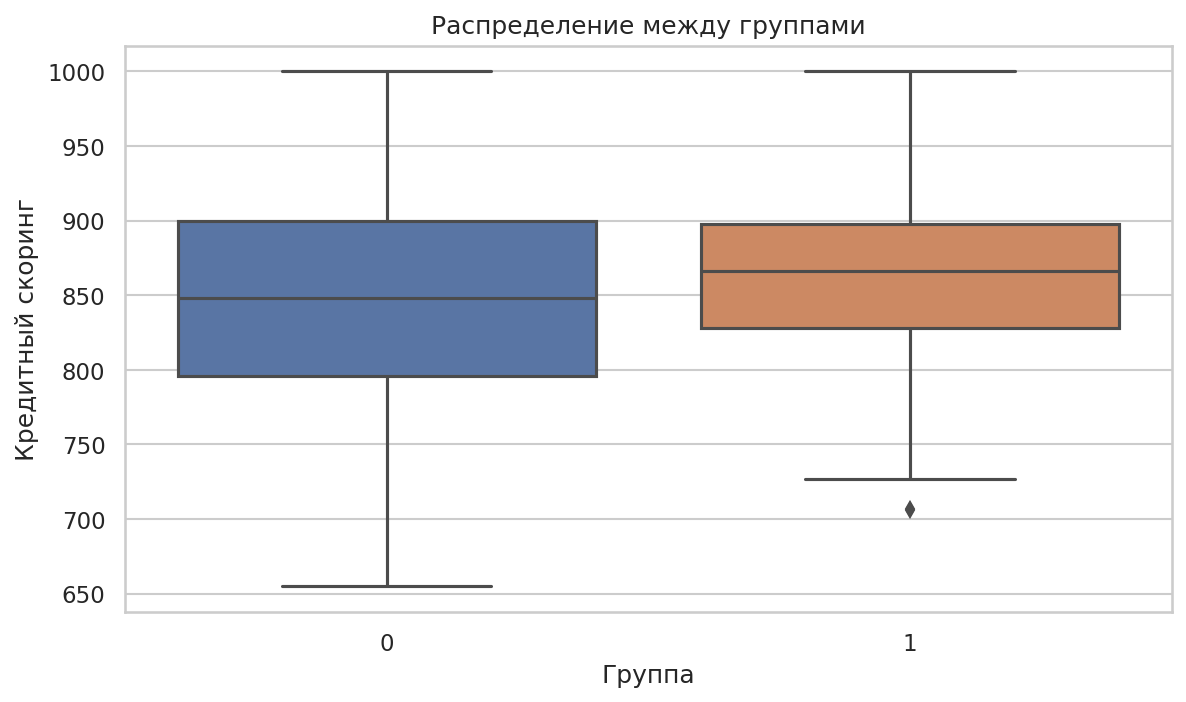

In [47]:
# Вызываем фукцию и передаем ей аргументы
# df = df
# grouped_col = 'churn'
# analyst_col = 'score'
# rus_name = 'Кредитный скоринг'
# group1_value =  1 (ушедшие клиенты)
# group2_value = 0 (лояльные клиенты)
# alternative = 'greater'
t_test(df, 'churn', 'score', 'Кредитный скоринг', 1, 0, alternative='greater')

Отвергаем нулевую гипотезу в пользу альтернативной - **Кредитный скоринг (score) у ушедших клиентов больше чем у лояльных клиентов**. Анализ EDA  показал, что наибольший процент оттока наблюдается среди клиентов с кредитным скорингом в диапазоне 820-940, в то время как клиенты с максимальным скорингом проявляют большую лояльность. Тем не менее, в среднем кредитный скоринг ушедших клиентов оказывается выше, что негативно сказывается на успешном развитии банка.

  ### Гипотеза № 4: 
**Проверка гипотезы: Зарплата у клиентов в Ярославле больше чем у Клиентов в Рыбинске.**
Сформулируем гипотезы (одностороняя гипотеза):
* Нулевая гипотеза (H0): Зарплата (est_salary) у клиентов в Ярославле не больше чем у Клиентов в Рыбинске.
* Альтернативная гипотеза (H1): Зарплата (est_salary) у клиентов в Ярославле больше зарплаты у клиентов в Рыбинске.

Выборки больше 30, можно проводить t-тест Стьюдента

Размеры выборок различаются более чем на 25%. Применяем поправку Уэлча, equal_var=False.
ttest Стьюдента: p-value = 1.9907691766677486e-13

Статистически значимые различия обнаружены (p < 0.05)
Отвергаем нулевую гипотезу в пользу альтернативной

Средние значения групп:
- Группа 1: 129691.99
- Группа 2: 118633.34
Разница средних: 11058.66


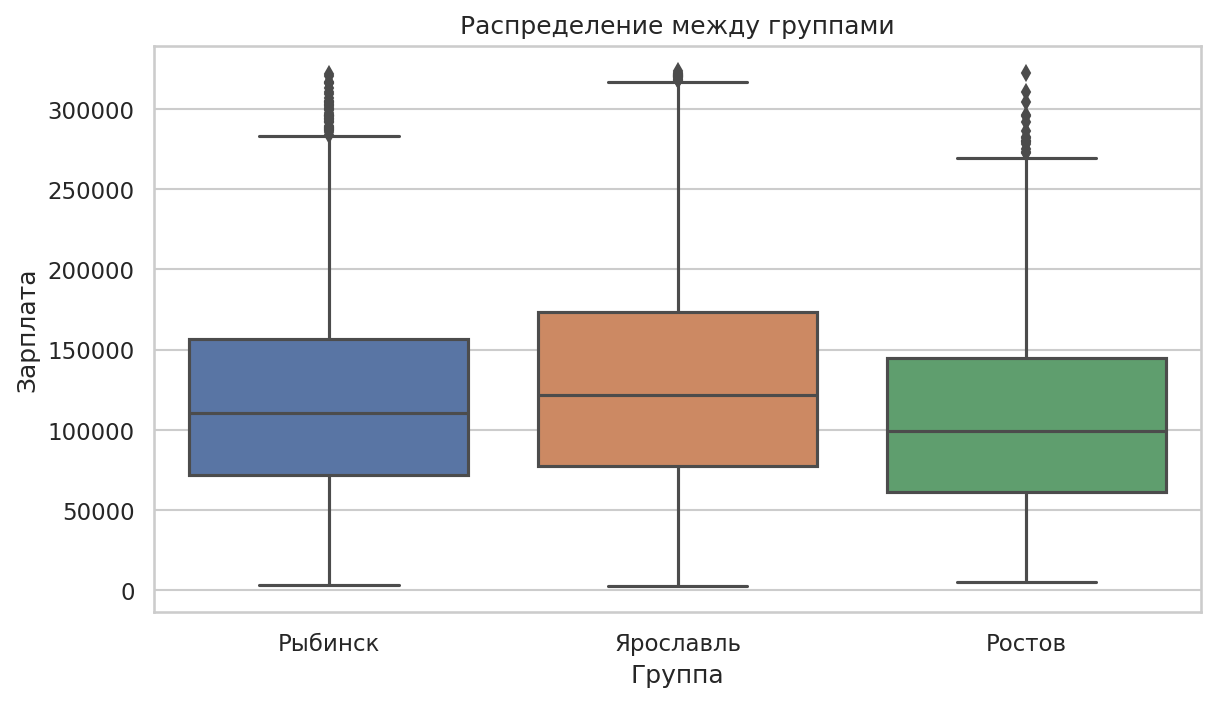

In [48]:
# Вызываем фукцию и передаем ей аргументы   
# df = df
# grouped_col = 'city'
# analyst_col = 'est_salary'
# rus_name = 'Зарплата'
# group1_value = "Ярославль"
# group2_value = 'Рыбинск'
# alternative = 'greater'
t_test(df, 'city', 'est_salary', 'Зарплата', 'Ярославль', "Рыбинск", alternative='greater')

Отвергаем нулевую гипотезу в пользу альтернативной - **Зарплата у клиентов в Ярославле больше зарплаты у клиентов в Рыбинске**.  Несмотря на то что график отображает данные по трем городам из-за особенностей кастомной функции, это не влияет на корректность применения t-теста. Мы наблюдаем ожидаемую тенденцию: зарплата в областном центре, Ярославле, действительно выше, чем в других городах области. В ходе анализа разведывательных данных (EDA) мы также заметили, что уровень оттока клиентов в Ярославле несколько превышает средние показатели по банку.

**Выводы по этапу 4 (Проверка гипотез):**

Все гипотезы подтвердились и мы имеем на лицо негативную картину для банка. 
1. Зарплаты лояльных и ушедших клиентов не равны, на графике мы наблюдаем, что зарплаты ушедших клиентов выше лояльных.
2. Ушедшие клиенты имеют более высокий баланс на счетах по сравнению с оставшимися клиентами.
3. Мужчины-клиенты банка зарабатывают больше женщин, и поскольку уровень оттока среди мужчин выше, это создает дополнительные риски для банка.
4. Ушедшие клиенты демонстрируют более высокий кредитный рейтинг по сравнению с лояльными, что означает потерю потенциальной прибыли от кредитования.
5. Отток в региональной столице Ярославле выше чем в других городах региона.

<a id="step_5"></a>
## Подведение промежуточных итогов - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток.

Анализ данных (EDA) и проверка гипотез выявили тревожные признаки, указывающие на высокий уровень оттока обеспеченных клиентов из банка. Ушедшие клиенты в среднем имеют более высокий уровень дохода и активов, что создает риски для финансовой устойчивости банка. Основные факторы, способствующие оттоку, включают большое количество баллов собственности, высокую зарплату, высокие баллы кредитного скоринга, высокие балансы на счетах, гендерный дисбаланс и возрастные группы риска. 

Признаки, влияющие на отток клиентов:
1. Уровень дохода: Ушедшие клиенты имеют более высокий доход по сравнению с оставшимися, что указывает на потерю прибыльной аудитории.  
2. Баланс на счетах: Клиенты с балансом свыше 750 000 рублей покидают банк чаще, чем другие, что подчеркивает важность финансового состояния клиентов.
3. Количество продуктов: У клиентов с тремя и более продуктами уровень оттока достигает 61%, что говорит о том, что наличие множества услуг не всегда удерживает клиента.
4. Кредитный скоринг: Ушедшие клиенты демонстрируют более высокий кредитный рейтинг, особенно в диапазоне 860-870 баллов, что указывает на потерю клиентов с хорошей кредитной историей.
5. Гендерный фактор: Мужчины покидают банк в 2 раза чаще, чем женщины.
6. Возрастные группы: Молодые клиенты (25-35 лет) и клиенты в возрасте 50-60 лет являются группами риска с высоким уровнем оттока.
7. Региональный фактор: Имеется небольшое повышение уровня оттока в Ярославле и Ростове.

Можно сделать предположение, что клиенты уходят из регионального банка в федеральные в поисках более удобного сервиса и лучших условий. Для снижения уровня оттока в следующем разделе мы выделим сегменты с оттоком, превышающим средний по банку, для разработки решений по удержанию клиентов из этого сегмента.

<a id="step_6"></a>
## Сегментация (неузкие сегменты (от 500 клиентов на сегмент); не менее трёх; отток выше, чем средний уровень оттока по банку).

Сформируем сегменты на основе результатов исследования данных о клиентах банка, используя эвристический способ.
Сегментируем по демографическим характеристикам. У нас было два интервала по возрасту, а также мы выявили повышенный отток у мужчин.  
* **Сегмент 1** - Мужчины от 25 до 35.
* **Сегмент 2** - Мужчины от 50 до 60.

Учитывая высокий отток клиентов без кредитной карты, выделим сегмент клиентов без кредитки, но сузим эту аудиторию фильтром по высокой зарплате (от 100 000 рублей). Также нас интересуют клиенты с высоким кредитным скорингом от 820 до 940 баллов, добавим фильтр по активности клиентов в этой группе.  
* **Сегмент 3** - Нет кредитки, скоринг 820-940, зарплата от 100 000, активный клиент.

Далее перейдем к баллам собственности (equity), наиболее коррелирующему признаку оттока клиентов. Добавим к этому еще признаки обеспеченных клиентов: баланс более 750 000 рублей, а также наличие у клиента более двух продуктов банка.   
* **Сегмент 4** - Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов.

Анализ данных показал большой отток клиентов с признаками зажиточности, попробуем выделить еще один похожий сегмент. К фильтру "баланс больше 450 000 рублей" добавим высокую зарплату от 100 000 рублей (показатель потенциальных доходов), а также выделим клиентов, активно пользующихся банковскими услугами.  
* **Сегмент 5** - Баланс более 750 000, зарплата от 100 000, активный клиент.
Также в анализе данных мы наблюдали небольшое влияние города на отток клиентов. Попробуем сформировать сегмент на основе этого признака. Для привлекательности этой группы для банка добавим высокую зарплату от 100 000 рублей, а также активность клиента.  
* **Сегмент 6** - Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент.

Для удобства работы на этом этапе:
1. Выведем на печать средний отток по банку.
2. Создадим кастомную функцию с характеристиками сегмента, чтобы сформировать таблицу с сегментами для дальнейшего их ранжирования.
3. Создадим таблицу с сегментами.

In [49]:
# Выводим для напоминания средний отток по банку
print(f'Средний отток по банку: {(avg_churn*100).round(2)}%')

Средний отток по банку: 18.2%


In [50]:
# Создаем функцию для создания словаря (это будет строкой в таблице сегментов)
def create_segment(name, df):

    return {
        "name": name,
        "num_clients": df.shape[0],
        'churn': round(df['churn'].mean(), 3),
        'est_salary_median': int(df['est_salary'].median()),
        'balance_median': int(df['balance'].median()),
        'equity_median': int(df['equity'].median()),
    }

### Сегмент 1  - Мужчины от 25 до 35.

In [51]:
# Мужчины от 25 до 35
df1 = df[
    (df['gender'] == 'М') & 
    (df['age'].between(25, 35))
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%') 

Количество клиентов 1780
Отток: 25.51%


Количество клиентов > 500 и отток выше среднего по банку.

Сохраняем первый сегмент.

In [52]:
# Сохраним характеристики 1-го сегмента
segment_1  = create_segment('Сегмент 1 (Мужчины от 24 до 33)', df1)
segment_1

{'name': 'Сегмент 1 (Мужчины от 24 до 33)',
 'num_clients': 1780,
 'churn': 0.255,
 'est_salary_median': 104763,
 'balance_median': 423823,
 'equity_median': 3}

### Сегмент 2 - Мужчины от 50 до 60.

In [53]:
# Мужчины от 50 до 60
df1 = df[
    (df['gender'] == 'М') & 
    (df['age'].between(50, 60))
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%') 

Количество клиентов 777
Отток: 33.33%


Количество клиентов > 500 и отток выше среднего по банку.

Сохраняем второй сегмент.

In [54]:
# Сохраним характеристики 2-го сегмента
segment_2  = create_segment('Сегмент 2 (Мужчины от 50 до 60)', df1)
segment_2

{'name': 'Сегмент 2 (Мужчины от 50 до 60)',
 'num_clients': 777,
 'churn': 0.333,
 'est_salary_median': 114538,
 'balance_median': 719809,
 'equity_median': 3}

### Сегмент 3 - Нет кредитки, скоринг 820-940, зарплата от 100 000, активный клиент.

In [55]:
# Нет кредитки, скоринг от 820 до 940, зарплата от 100 000 и выше, last_activity = 1
df1 = df[
    (
        (df['score'].between(820, 940)) | 
        (df['credit_card'] == 0)
    ) & 
    (df['est_salary'] >= 100000) & 
    (df['last_activity'] == 1)
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%')

Количество клиентов 2225
Отток: 34.29%


Отток клиентов в нашем сегменте выше среднего по банку, однако количество клиентов в этом сегменте очень велико. Попробуем сузить сегмент, установить фильтр по **пику** оттока для клиентов со скорингом от 860 до 870.

In [56]:
# Нет кредитки, скоринг от 860 до 870, зарплата от 100 000 и выше, last_activity = 1
df1 = df[
    (
        (df['score'].between(860, 870)) | 
        (df['credit_card'] == 0)
    ) & 
    (df['est_salary'] >= 100000) & 
    (df['last_activity'] == 1)
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%')

Количество клиентов 1084
Отток: 42.9%


После изменения фильтра по скорингу наблюдаем увеличение уровня оттока почти на 9 процентов, а также сужение сегмента на 1135 человек. Оставим изменения в силе и примем фильтр по скорингу от **860 до 870**.

In [57]:
# Сохраним характеристики 3-го сегмента
segment_3  = create_segment(
    "Сегмент 3 (Нет кредитки, скоринг 860-870, зарплата от 100 000, активный клиент)", df1
)
segment_3

{'name': 'Сегмент 3 (Нет кредитки, скоринг 860-870, зарплата от 100 000, активный клиент)',
 'num_clients': 1084,
 'churn': 0.429,
 'est_salary_median': 159295,
 'balance_median': 875125,
 'equity_median': 4}

### Сегмент 4 - Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов.

In [58]:
# balance > 450 000, equity > 2, products > 2
df1 = df[
    (df['balance'] > 750000) &
    (df['equity'] > 2) &
    (df['products'] > 2)
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%')

Количество клиентов 671
Отток: 53.95%


Мы получаем очень высокий уровень оттока: из этого сегмента уходят 54% клиентов, а также формируется хорошая группа в размере 671 человек.

In [59]:
# Сохраним характеристики 4-го сегмента
segment_4  = create_segment(
    "Сегмент 4 (Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов)",
                            df1
)
segment_4

{'name': 'Сегмент 4 (Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов)',
 'num_clients': 671,
 'churn': 0.539,
 'est_salary_median': 140312,
 'balance_median': 1352028,
 'equity_median': 4}

### Сегмент 5 - Баланс более 750 000, зарплата от 100 000, активный клиент.

In [60]:
# last_activity = 1, зарплата от 100 000, balance > 450 000
df1 = df[
    (df['last_activity'] == 1) &
    (df['est_salary'] >= 100000) &
    (df['balance'] > 750000)
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%')

Количество клиентов 975
Отток: 57.44%


В сегменте номер 5 самый высокий уровень оттока: каждый второй клиент уходит из банка, а также у нас есть хорошая выборка клиентов в размере 975 человек.

In [61]:
# Сохраним характеристики 5-го сегмента
segment_5  = create_segment(
    "Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент)",
                            df1
)
segment_5

{'name': 'Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент)',
 'num_clients': 975,
 'churn': 0.574,
 'est_salary_median': 161508,
 'balance_median': 1278803,
 'equity_median': 4}

### Сегмент 6 - Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент.

In [62]:
df1 = df[
    ((df['city'] == 'Ярославль') | (df['city'] == 'Ростов')) & 
    (df['est_salary'] >= 100000) & 
    (df['last_activity'] == 1)
]

print(f'Количество клиентов {df1.shape[0]}')
print(f'Отток: {(df1["churn"].mean() * 100).round(2)}%')


Количество клиентов 2254
Отток: 28.53%


В сегменте номер 6 мы получаем очень большую выборку в размере 2245 человек, а также наблюдаем не очень высокий уровень оттока. Сохраним этот сегмент для анализа и приоритизации.

In [63]:
# Сохраним характеристики 6-го сегмента
segment_6  = create_segment(
    "Сегмент 6 (Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент)",
                            df1
)
segment_6

{'name': 'Сегмент 6 (Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент)',
 'num_clients': 2254,
 'churn': 0.285,
 'est_salary_median': 163683,
 'balance_median': 680513,
 'equity_median': 2}

### Создание таблицы с сегментами.

In [64]:
# Преобразуем в DataFrame
segments_df = pd.DataFrame([segment_1, segment_2, segment_3, segment_4, segment_5, segment_6])

segments_df

,name,num_clients,churn,est_salary_median,balance_median,equity_median
0,Сегмент 1 (Мужчины от 24 до 33),1780,0.255,104763,423823,3
1,Сегмент 2 (Мужчины от 50 до 60),777,0.333,114538,719809,3
2,"Сегмент 3 (Нет кредитки, скоринг 860-870, зарплата от 100 000, активный клиент)",1084,0.429,159295,875125,4
3,"Сегмент 4 (Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов)",671,0.539,140312,1352028,4
4,"Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент)",975,0.574,161508,1278803,4
5,"Сегмент 6 (Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент)",2254,0.285,163683,680513,2


<a id="step_7"></a>
##  Приоритизация сегментов.
1. Для удобства приоритизации выполним нормализацию характеристик сегментов, присвоив значения от 0 до 1.
2. Эвристически подберем веса для этих признаков.
3. Рассчитаем рейтинг и отсортируем таблицу по убыванию.


In [65]:
# Нормализация признаков

# Выберем числовые столбцы
numeric_cols = ['num_clients', 'churn', 'est_salary_median', 'balance_median', 'equity_median']

segments_norm_df = segments_df.copy()

# Выполним нормализацию числовых столбцов
for col in numeric_cols:
    segments_norm_df[col] = (segments_df[col]
                                   - segments_df[col].min()) / (segments_df[col].max()
                                                                - segments_df[col].min())
segments_norm_df

,name,num_clients,churn,est_salary_median,balance_median,equity_median
0,Сегмент 1 (Мужчины от 24 до 33),0.700569,0.000000,0.000000,0.000000,0.5
1,Сегмент 2 (Мужчины от 50 до 60),0.066961,0.244514,0.165903,0.318880,0.5
2,"Сегмент 3 (Нет кредитки, скоринг 860-870, зарплата от 100 000, активный клиент)",0.260897,0.545455,0.925526,0.486209,1.0
3,"Сегмент 4 (Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов)",0.000000,0.890282,0.603344,1.000000,1.0
4,"Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент)",0.192040,1.000000,0.963086,0.921111,1.0
5,"Сегмент 6 (Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент)",1.000000,0.094044,1.000000,0.276545,0.0


In [66]:
 # Устанавливаем веса для признаков эвристически
w = {
    'churn': 0.35,             # Самый важный признак
    'est_salary_median': 0.25, # зарплата = потенциал доходов    
    'equity_median': 0.25,     # у equity наибольшая корреляция с оттоком
    'balance_median': 0.1,
    'num_clients': 0.05   
}    

# Рассчитываем рейтинг
segments_norm_df['rating'] = (
    segments_norm_df['num_clients'] * w['num_clients'] + 
    segments_norm_df['churn'] * w['churn'] + 
    segments_norm_df['est_salary_median'] * w['est_salary_median'] +
    segments_norm_df['balance_median'] * w['balance_median'] +
    segments_norm_df['equity_median'] * w['equity_median']
)

segments_norm_df

,name,num_clients,churn,est_salary_median,balance_median,equity_median,rating
0,Сегмент 1 (Мужчины от 24 до 33),0.700569,0.000000,0.000000,0.000000,0.5,0.160028
1,Сегмент 2 (Мужчины от 50 до 60),0.066961,0.244514,0.165903,0.318880,0.5,0.287292
2,"Сегмент 3 (Нет кредитки, скоринг 860-870, зарплата от 100 000, активный клиент)",0.260897,0.545455,0.925526,0.486209,1.0,0.733956
3,"Сегмент 4 (Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов)",0.000000,0.890282,0.603344,1.000000,1.0,0.812435
4,"Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент)",0.192040,1.000000,0.963086,0.921111,1.0,0.942485
5,"Сегмент 6 (Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент)",1.000000,0.094044,1.000000,0.276545,0.0,0.360570


In [67]:
# Оставляем в таблице только подля 'name' и 'rating', выполняем сортировку по рейтингу 
segment_prioritization = segments_norm_df[['name', 'rating']]
segment_prioritization = segment_prioritization.sort_values(by='rating', 
                                                            ascending=False).reset_index(drop=True)

# Возвращаем в таблицу значения оттока и количества клиентов в сегменте
segment_prioritization = (
    segment_prioritization
    .merge(segments_df[['name', 'churn', 'num_clients']], 
           on='name', 
           how='left')  
)

segment_prioritization

,name,rating,churn,num_clients
0,"Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент)",0.942485,0.574,975
1,"Сегмент 4 (Балл собственности более 2, баланс более 750 000 р, имеет более 2-х продутов)",0.812435,0.539,671
2,"Сегмент 3 (Нет кредитки, скоринг 860-870, зарплата от 100 000, активный клиент)",0.733956,0.429,1084
3,"Сегмент 6 (Город: Ярославль или Ростов, Зарплата от 100 000, активный клиент)",0.360570,0.285,2254
4,Сегмент 2 (Мужчины от 50 до 60),0.287292,0.333,777
5,Сегмент 1 (Мужчины от 24 до 33),0.160028,0.255,1780


<a id="step_8"></a>
## Формирование рекомендаций (таргетированных) по работе с клиентами

Рекомендации по удержанию клиентов по каждому сегменту в порядке убывания рейтинга:

1. Сегмент 5 (Баланс более 750 000, зарплата от 100 000, активный клиент):  
   Сегмент с самым высоким оттоком — 57%. В него входят обеспеченные клиенты, и банку крайне невыгодно терять каждого второго клиента из этой выборки. Вероятно, уход клиентов связан с наличием лучшего сервиса и более выгодных условий у федеральных банков-конкурентов. Рекомендации по удержанию клиентов из этого сегмента:  
* Внедрение VIP-менеджеров для обслуживания таких клиентов (если это еще не реализовано).  
* Персонализированные предложения по основным продуктам (например, предложить более высокие проценты по вкладам, пониженные ставки на крупные кредиты и ипотеку).  
* Увеличение процента кэшбека на дорогие покупки (недвижимость, автомобили).
2. Сегмент 4 (Балл собственности более 2, баланс более 750 000 руб., имеет более 2-х продуктов):  
   Еще один сегмент с обеспеченными клиентами. Помимо рекомендаций, предложенных для сегмента 5, сюда можно добавить:  
* Вознаграждение за лояльность (например, снижение ставок при использовании трех и более продуктов).  
* Консультации по управлению активами.
3. Сегмент 3 (Нет кредитной карты, скоринг 860-870, зарплата от 100 000, активный клиент):  
   Третье место в приоритезации сегментов. Банк теряет потенциальную прибыль от кредитования таких клиентов, так как высокий уровень кредитного скоринга делает их выгодными для банков. Рекомендации по удержанию клиентов из этого сегмента:  
* Поскольку наличие кредитной карты значительно снижает уровень оттока, логично предложить оформление кредитной карты. Для привлечения клиентов можно предложить пониженный процент (ниже, чем у конкурентов), льготный период (например, без процентов первые сто дней или большее количество дней, чем у конкурентов), а также доставку карты и возможность оформления онлайн.
4. Сегмент 6 (Город: Ярославль/Ростов, зарплата от 100 000 руб., активные клиенты):  
   Неожиданно этот сегмент на основе географического расположения занял 4-е место. Сегмент достаточно большой, и всем клиентам можно направить одинаковые предложения:  
* Повышенный кэшбек на покупки в местных магазинах-партнерах.  
* Повышенный кэшбек за использование такси и общественного транспорта в этих городах.
5. Сегмент 2 (Мужчины от 50 до 60 лет):  
   Учитывая предпенсионный возраст клиентов и расположение городов на воде, можно предложить:  
* Выгодные пенсионные программы.  
* Скидки или повышенные кэшбеки в рыболовных магазинах, а также в магазинах продаж лодок и катеров.
6. Сегмент 1 (Мужчины от 24 до 33 лет):  
   Учитывая молодой возраст клиентов, можно предложить:  
* Кредиты на стартапы или образование (для молодых профессионалов).  
* Кэшбек на посещение развлекательных и культурных мероприятий.  
* Бонусы за активное использование продуктов банка.
   
Общие рекомендации:  
* Провести мониторинг удовлетворенности клиентов через опросы и выявить проблемы и болевые точки (например, удобство мобильного приложения банка).  

* Провести анализ продуктов банков-конкурентов, особенно в премиальном сегменте.